# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 3.865091e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 1.555470e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149607938732093


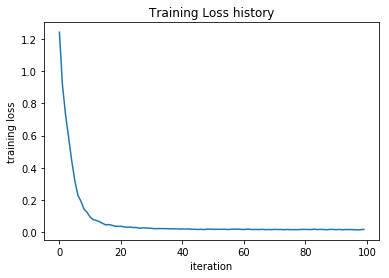

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

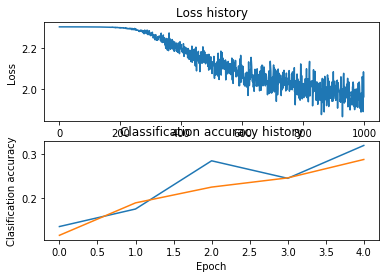

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

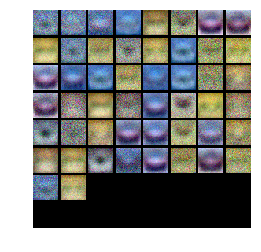

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [17]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################

hidden_size = range(300, 500, 25)

results = {}
best_val_acc = 0
best_net = None

# learning_rates = np.array([0.7, 0.8, 0.9, 1, 1.1])*1e-3
# regularization_strengths = [0.75, 1, 1.25]
regularization_strengths = np.linspace(0.01, 0.15, num=4)
learning_rates = np.array([1, 1.6, 2.5])*1e-4


for hs in hidden_size:
    for lr in learning_rates:
        for reg in regularization_strengths:
            print((hs,lr,reg))
           
        
            input_size = 32 * 32 * 3
            hidden_size = hs
            num_classes = 10
            net = TwoLayerNet(input_size, hidden_size, num_classes)

            # Train the network
            stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=20000, batch_size=30,
            learning_rate=lr, learning_rate_decay=0.92,
            reg=reg, verbose=True)
        
        
            
            val_acc = (net.predict(X_val) == y_val).mean()
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_net = net         
            results[(hs,lr,reg)] = val_acc

# Print out results.
for hs,lr, reg in sorted(results):
    val_acc = results[(hs, lr, reg)]
    print( 'hs %d lr %e reg %e val accuracy: %f' % (hs, lr, reg,  val_acc))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val_acc)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

(300, 0.0001, 0.01)
iteration 0 / 20000: loss 2.302571
iteration 100 / 20000: loss 2.301027
iteration 200 / 20000: loss 2.294126
iteration 300 / 20000: loss 2.152452
iteration 400 / 20000: loss 2.148494
iteration 500 / 20000: loss 2.120201
iteration 600 / 20000: loss 1.802354
iteration 700 / 20000: loss 1.801674
iteration 800 / 20000: loss 2.001471
iteration 900 / 20000: loss 1.854914
iteration 1000 / 20000: loss 1.743054
iteration 1100 / 20000: loss 2.042197
iteration 1200 / 20000: loss 1.614054
iteration 1300 / 20000: loss 2.098384
iteration 1400 / 20000: loss 1.906377
iteration 1500 / 20000: loss 1.509865
iteration 1600 / 20000: loss 1.818078
iteration 1700 / 20000: loss 1.647120
iteration 1800 / 20000: loss 1.661166
iteration 1900 / 20000: loss 1.624416
iteration 2000 / 20000: loss 1.785465
iteration 2100 / 20000: loss 1.641587
iteration 2200 / 20000: loss 1.430386
iteration 2300 / 20000: loss 1.914756
iteration 2400 / 20000: loss 1.820572
iteration 2500 / 20000: loss 1.480860
iter

iteration 1300 / 20000: loss 1.829505
iteration 1400 / 20000: loss 1.571356
iteration 1500 / 20000: loss 1.829365
iteration 1600 / 20000: loss 1.854104
iteration 1700 / 20000: loss 1.586954
iteration 1800 / 20000: loss 1.531988
iteration 1900 / 20000: loss 1.707079
iteration 2000 / 20000: loss 1.497721
iteration 2100 / 20000: loss 1.832913
iteration 2200 / 20000: loss 2.055077
iteration 2300 / 20000: loss 1.891876
iteration 2400 / 20000: loss 1.985685
iteration 2500 / 20000: loss 1.427220
iteration 2600 / 20000: loss 1.508835
iteration 2700 / 20000: loss 1.932712
iteration 2800 / 20000: loss 1.524274
iteration 2900 / 20000: loss 1.245702
iteration 3000 / 20000: loss 1.386238
iteration 3100 / 20000: loss 1.736556
iteration 3200 / 20000: loss 1.784470
iteration 3300 / 20000: loss 1.492011
iteration 3400 / 20000: loss 1.337903
iteration 3500 / 20000: loss 1.611137
iteration 3600 / 20000: loss 1.344377
iteration 3700 / 20000: loss 1.330926
iteration 3800 / 20000: loss 1.514414
iteration 39

iteration 2600 / 20000: loss 1.790051
iteration 2700 / 20000: loss 1.686346
iteration 2800 / 20000: loss 1.899011
iteration 2900 / 20000: loss 1.391431
iteration 3000 / 20000: loss 1.474367
iteration 3100 / 20000: loss 1.550675
iteration 3200 / 20000: loss 1.641241
iteration 3300 / 20000: loss 1.553734
iteration 3400 / 20000: loss 1.774690
iteration 3500 / 20000: loss 1.648512
iteration 3600 / 20000: loss 1.582089
iteration 3700 / 20000: loss 1.488706
iteration 3800 / 20000: loss 1.371265
iteration 3900 / 20000: loss 1.911507
iteration 4000 / 20000: loss 1.461392
iteration 4100 / 20000: loss 1.334835
iteration 4200 / 20000: loss 1.927276
iteration 4300 / 20000: loss 1.776760
iteration 4400 / 20000: loss 1.571039
iteration 4500 / 20000: loss 1.563820
iteration 4600 / 20000: loss 1.443642
iteration 4700 / 20000: loss 1.202605
iteration 4800 / 20000: loss 1.684951
iteration 4900 / 20000: loss 1.575094
iteration 5000 / 20000: loss 1.628521
iteration 5100 / 20000: loss 1.550562
iteration 52

iteration 3900 / 20000: loss 1.548689
iteration 4000 / 20000: loss 1.563875
iteration 4100 / 20000: loss 1.586505
iteration 4200 / 20000: loss 1.818566
iteration 4300 / 20000: loss 1.304875
iteration 4400 / 20000: loss 1.634519
iteration 4500 / 20000: loss 1.623205
iteration 4600 / 20000: loss 1.352929
iteration 4700 / 20000: loss 1.773099
iteration 4800 / 20000: loss 1.279783
iteration 4900 / 20000: loss 1.380817
iteration 5000 / 20000: loss 1.368551
iteration 5100 / 20000: loss 1.306739
iteration 5200 / 20000: loss 1.679171
iteration 5300 / 20000: loss 2.024644
iteration 5400 / 20000: loss 1.441323
iteration 5500 / 20000: loss 1.478970
iteration 5600 / 20000: loss 1.507502
iteration 5700 / 20000: loss 1.532121
iteration 5800 / 20000: loss 1.332173
iteration 5900 / 20000: loss 1.589351
iteration 6000 / 20000: loss 1.330250
iteration 6100 / 20000: loss 1.614781
iteration 6200 / 20000: loss 1.565120
iteration 6300 / 20000: loss 1.587506
iteration 6400 / 20000: loss 1.106573
iteration 65

iteration 5200 / 20000: loss 1.011019
iteration 5300 / 20000: loss 1.455782
iteration 5400 / 20000: loss 1.003810
iteration 5500 / 20000: loss 1.248941
iteration 5600 / 20000: loss 1.465142
iteration 5700 / 20000: loss 1.635110
iteration 5800 / 20000: loss 1.343119
iteration 5900 / 20000: loss 1.295590
iteration 6000 / 20000: loss 1.615233
iteration 6100 / 20000: loss 1.242470
iteration 6200 / 20000: loss 1.431482
iteration 6300 / 20000: loss 1.350072
iteration 6400 / 20000: loss 1.397181
iteration 6500 / 20000: loss 1.582050
iteration 6600 / 20000: loss 1.270149
iteration 6700 / 20000: loss 1.171108
iteration 6800 / 20000: loss 1.630616
iteration 6900 / 20000: loss 1.476538
iteration 7000 / 20000: loss 1.244279
iteration 7100 / 20000: loss 1.705592
iteration 7200 / 20000: loss 1.498402
iteration 7300 / 20000: loss 1.129815
iteration 7400 / 20000: loss 1.299720
iteration 7500 / 20000: loss 1.289975
iteration 7600 / 20000: loss 1.175787
iteration 7700 / 20000: loss 1.276536
iteration 78

iteration 6500 / 20000: loss 1.152361
iteration 6600 / 20000: loss 1.271609
iteration 6700 / 20000: loss 1.263820
iteration 6800 / 20000: loss 1.478933
iteration 6900 / 20000: loss 1.449234
iteration 7000 / 20000: loss 1.238039
iteration 7100 / 20000: loss 1.591403
iteration 7200 / 20000: loss 1.112772
iteration 7300 / 20000: loss 1.320931
iteration 7400 / 20000: loss 1.292228
iteration 7500 / 20000: loss 1.274665
iteration 7600 / 20000: loss 1.716015
iteration 7700 / 20000: loss 1.371316
iteration 7800 / 20000: loss 1.152281
iteration 7900 / 20000: loss 1.376247
iteration 8000 / 20000: loss 1.434055
iteration 8100 / 20000: loss 0.966533
iteration 8200 / 20000: loss 1.144720
iteration 8300 / 20000: loss 1.114256
iteration 8400 / 20000: loss 1.428061
iteration 8500 / 20000: loss 1.350056
iteration 8600 / 20000: loss 1.225118
iteration 8700 / 20000: loss 1.568353
iteration 8800 / 20000: loss 1.664261
iteration 8900 / 20000: loss 1.165823
iteration 9000 / 20000: loss 1.304987
iteration 91

iteration 7800 / 20000: loss 1.353273
iteration 7900 / 20000: loss 1.530273
iteration 8000 / 20000: loss 1.204354
iteration 8100 / 20000: loss 1.425416
iteration 8200 / 20000: loss 1.431268
iteration 8300 / 20000: loss 1.252167
iteration 8400 / 20000: loss 1.236895
iteration 8500 / 20000: loss 1.692396
iteration 8600 / 20000: loss 1.350679
iteration 8700 / 20000: loss 1.392309
iteration 8800 / 20000: loss 1.254750
iteration 8900 / 20000: loss 1.501844
iteration 9000 / 20000: loss 1.247318
iteration 9100 / 20000: loss 1.332739
iteration 9200 / 20000: loss 1.224070
iteration 9300 / 20000: loss 1.309428
iteration 9400 / 20000: loss 0.949560
iteration 9500 / 20000: loss 1.312790
iteration 9600 / 20000: loss 0.913251
iteration 9700 / 20000: loss 1.039690
iteration 9800 / 20000: loss 1.220505
iteration 9900 / 20000: loss 1.371674
iteration 10000 / 20000: loss 1.433596
iteration 10100 / 20000: loss 1.826132
iteration 10200 / 20000: loss 1.541299
iteration 10300 / 20000: loss 1.147338
iteratio

iteration 9100 / 20000: loss 1.241962
iteration 9200 / 20000: loss 0.983426
iteration 9300 / 20000: loss 1.226770
iteration 9400 / 20000: loss 1.102019
iteration 9500 / 20000: loss 1.215487
iteration 9600 / 20000: loss 1.492227
iteration 9700 / 20000: loss 1.428765
iteration 9800 / 20000: loss 1.371090
iteration 9900 / 20000: loss 1.040530
iteration 10000 / 20000: loss 1.479063
iteration 10100 / 20000: loss 1.081486
iteration 10200 / 20000: loss 1.436553
iteration 10300 / 20000: loss 1.770563
iteration 10400 / 20000: loss 1.428405
iteration 10500 / 20000: loss 1.926016
iteration 10600 / 20000: loss 1.144963
iteration 10700 / 20000: loss 1.340556
iteration 10800 / 20000: loss 1.278017
iteration 10900 / 20000: loss 1.311924
iteration 11000 / 20000: loss 1.569536
iteration 11100 / 20000: loss 1.183158
iteration 11200 / 20000: loss 1.599396
iteration 11300 / 20000: loss 1.228542
iteration 11400 / 20000: loss 1.094022
iteration 11500 / 20000: loss 1.316813
iteration 11600 / 20000: loss 1.52

iteration 10400 / 20000: loss 1.569805
iteration 10500 / 20000: loss 1.236536
iteration 10600 / 20000: loss 0.998738
iteration 10700 / 20000: loss 0.913306
iteration 10800 / 20000: loss 1.302407
iteration 10900 / 20000: loss 1.110555
iteration 11000 / 20000: loss 1.361444
iteration 11100 / 20000: loss 1.573588
iteration 11200 / 20000: loss 1.155117
iteration 11300 / 20000: loss 1.423338
iteration 11400 / 20000: loss 0.827152
iteration 11500 / 20000: loss 0.975896
iteration 11600 / 20000: loss 0.885428
iteration 11700 / 20000: loss 1.043776
iteration 11800 / 20000: loss 0.939563
iteration 11900 / 20000: loss 1.048841
iteration 12000 / 20000: loss 1.276678
iteration 12100 / 20000: loss 0.660810
iteration 12200 / 20000: loss 0.900159
iteration 12300 / 20000: loss 0.947832
iteration 12400 / 20000: loss 1.237706
iteration 12500 / 20000: loss 1.035993
iteration 12600 / 20000: loss 1.579714
iteration 12700 / 20000: loss 1.182553
iteration 12800 / 20000: loss 1.320331
iteration 12900 / 20000: 

iteration 11600 / 20000: loss 1.113408
iteration 11700 / 20000: loss 1.295489
iteration 11800 / 20000: loss 1.124822
iteration 11900 / 20000: loss 1.271955
iteration 12000 / 20000: loss 1.193958
iteration 12100 / 20000: loss 1.038820
iteration 12200 / 20000: loss 1.179389
iteration 12300 / 20000: loss 1.314313
iteration 12400 / 20000: loss 0.865931
iteration 12500 / 20000: loss 0.862854
iteration 12600 / 20000: loss 0.969642
iteration 12700 / 20000: loss 0.987855
iteration 12800 / 20000: loss 1.370202
iteration 12900 / 20000: loss 0.912288
iteration 13000 / 20000: loss 1.115460
iteration 13100 / 20000: loss 1.265261
iteration 13200 / 20000: loss 1.350964
iteration 13300 / 20000: loss 0.978118
iteration 13400 / 20000: loss 1.232704
iteration 13500 / 20000: loss 1.333696
iteration 13600 / 20000: loss 0.998230
iteration 13700 / 20000: loss 1.118787
iteration 13800 / 20000: loss 1.071368
iteration 13900 / 20000: loss 1.802074
iteration 14000 / 20000: loss 1.113337
iteration 14100 / 20000: 

iteration 12900 / 20000: loss 1.740190
iteration 13000 / 20000: loss 1.285314
iteration 13100 / 20000: loss 0.843943
iteration 13200 / 20000: loss 1.486005
iteration 13300 / 20000: loss 1.587672
iteration 13400 / 20000: loss 1.290114
iteration 13500 / 20000: loss 1.155084
iteration 13600 / 20000: loss 1.210782
iteration 13700 / 20000: loss 1.057028
iteration 13800 / 20000: loss 1.430121
iteration 13900 / 20000: loss 1.258149
iteration 14000 / 20000: loss 1.601655
iteration 14100 / 20000: loss 0.821530
iteration 14200 / 20000: loss 1.363243
iteration 14300 / 20000: loss 1.435858
iteration 14400 / 20000: loss 1.723306
iteration 14500 / 20000: loss 1.097329
iteration 14600 / 20000: loss 1.076993
iteration 14700 / 20000: loss 1.439827
iteration 14800 / 20000: loss 1.301917
iteration 14900 / 20000: loss 1.527073
iteration 15000 / 20000: loss 1.398517
iteration 15100 / 20000: loss 1.069231
iteration 15200 / 20000: loss 1.650478
iteration 15300 / 20000: loss 1.279647
iteration 15400 / 20000: 

iteration 14200 / 20000: loss 1.079669
iteration 14300 / 20000: loss 1.640779
iteration 14400 / 20000: loss 1.485683
iteration 14500 / 20000: loss 1.019019
iteration 14600 / 20000: loss 1.069564
iteration 14700 / 20000: loss 1.455214
iteration 14800 / 20000: loss 1.117441
iteration 14900 / 20000: loss 1.580303
iteration 15000 / 20000: loss 1.300607
iteration 15100 / 20000: loss 1.425650
iteration 15200 / 20000: loss 1.121347
iteration 15300 / 20000: loss 1.416972
iteration 15400 / 20000: loss 1.275539
iteration 15500 / 20000: loss 1.412711
iteration 15600 / 20000: loss 1.391846
iteration 15700 / 20000: loss 1.617402
iteration 15800 / 20000: loss 0.962913
iteration 15900 / 20000: loss 1.140643
iteration 16000 / 20000: loss 1.158071
iteration 16100 / 20000: loss 1.269850
iteration 16200 / 20000: loss 1.362538
iteration 16300 / 20000: loss 1.274727
iteration 16400 / 20000: loss 1.283212
iteration 16500 / 20000: loss 1.093249
iteration 16600 / 20000: loss 1.362160
iteration 16700 / 20000: 

iteration 15500 / 20000: loss 1.144035
iteration 15600 / 20000: loss 1.171523
iteration 15700 / 20000: loss 1.211871
iteration 15800 / 20000: loss 1.099311
iteration 15900 / 20000: loss 1.477795
iteration 16000 / 20000: loss 1.507120
iteration 16100 / 20000: loss 1.554095
iteration 16200 / 20000: loss 1.147551
iteration 16300 / 20000: loss 1.268377
iteration 16400 / 20000: loss 1.043573
iteration 16500 / 20000: loss 1.361897
iteration 16600 / 20000: loss 1.186041
iteration 16700 / 20000: loss 1.309028
iteration 16800 / 20000: loss 1.136435
iteration 16900 / 20000: loss 1.269800
iteration 17000 / 20000: loss 1.382694
iteration 17100 / 20000: loss 1.410005
iteration 17200 / 20000: loss 1.164670
iteration 17300 / 20000: loss 1.033823
iteration 17400 / 20000: loss 1.360743
iteration 17500 / 20000: loss 1.172595
iteration 17600 / 20000: loss 1.237975
iteration 17700 / 20000: loss 1.503533
iteration 17800 / 20000: loss 0.990782
iteration 17900 / 20000: loss 1.081780
iteration 18000 / 20000: 

iteration 16800 / 20000: loss 1.150148
iteration 16900 / 20000: loss 1.448480
iteration 17000 / 20000: loss 1.100747
iteration 17100 / 20000: loss 1.611254
iteration 17200 / 20000: loss 1.291766
iteration 17300 / 20000: loss 1.193346
iteration 17400 / 20000: loss 1.474108
iteration 17500 / 20000: loss 1.311600
iteration 17600 / 20000: loss 1.396598
iteration 17700 / 20000: loss 0.909132
iteration 17800 / 20000: loss 1.185196
iteration 17900 / 20000: loss 1.102590
iteration 18000 / 20000: loss 1.032143
iteration 18100 / 20000: loss 1.175919
iteration 18200 / 20000: loss 1.137320
iteration 18300 / 20000: loss 1.327711
iteration 18400 / 20000: loss 1.491542
iteration 18500 / 20000: loss 1.402386
iteration 18600 / 20000: loss 1.140659
iteration 18700 / 20000: loss 0.915736
iteration 18800 / 20000: loss 1.054550
iteration 18900 / 20000: loss 0.948727
iteration 19000 / 20000: loss 1.085854
iteration 19100 / 20000: loss 1.172078
iteration 19200 / 20000: loss 1.111793
iteration 19300 / 20000: 

iteration 18100 / 20000: loss 1.105036
iteration 18200 / 20000: loss 1.188203
iteration 18300 / 20000: loss 1.445190
iteration 18400 / 20000: loss 1.046548
iteration 18500 / 20000: loss 0.978931
iteration 18600 / 20000: loss 0.832213
iteration 18700 / 20000: loss 1.016569
iteration 18800 / 20000: loss 1.543768
iteration 18900 / 20000: loss 1.381566
iteration 19000 / 20000: loss 1.016025
iteration 19100 / 20000: loss 1.098253
iteration 19200 / 20000: loss 1.091174
iteration 19300 / 20000: loss 1.205837
iteration 19400 / 20000: loss 1.018527
iteration 19500 / 20000: loss 1.119336
iteration 19600 / 20000: loss 0.858102
iteration 19700 / 20000: loss 1.225979
iteration 19800 / 20000: loss 1.002347
iteration 19900 / 20000: loss 1.035115
(325, 0.0001, 0.15)
iteration 0 / 20000: loss 2.304010
iteration 100 / 20000: loss 2.301820
iteration 200 / 20000: loss 2.277155
iteration 300 / 20000: loss 2.236768
iteration 400 / 20000: loss 2.061818
iteration 500 / 20000: loss 1.922125
iteration 600 / 200

iteration 19400 / 20000: loss 1.218074
iteration 19500 / 20000: loss 1.193036
iteration 19600 / 20000: loss 1.413770
iteration 19700 / 20000: loss 1.263635
iteration 19800 / 20000: loss 1.158975
iteration 19900 / 20000: loss 1.135920
(325, 0.00016, 0.01)
iteration 0 / 20000: loss 2.302797
iteration 100 / 20000: loss 2.294089
iteration 200 / 20000: loss 2.185140
iteration 300 / 20000: loss 2.091034
iteration 400 / 20000: loss 2.109103
iteration 500 / 20000: loss 1.918283
iteration 600 / 20000: loss 1.989837
iteration 700 / 20000: loss 1.969387
iteration 800 / 20000: loss 1.888822
iteration 900 / 20000: loss 1.876229
iteration 1000 / 20000: loss 1.764303
iteration 1100 / 20000: loss 1.541824
iteration 1200 / 20000: loss 1.584231
iteration 1300 / 20000: loss 2.021247
iteration 1400 / 20000: loss 1.764596
iteration 1500 / 20000: loss 1.513207
iteration 1600 / 20000: loss 1.634594
iteration 1700 / 20000: loss 1.639723
iteration 1800 / 20000: loss 1.689923
iteration 1900 / 20000: loss 1.7467

iteration 600 / 20000: loss 2.002917
iteration 700 / 20000: loss 1.909935
iteration 800 / 20000: loss 1.583503
iteration 900 / 20000: loss 1.916885
iteration 1000 / 20000: loss 1.501115
iteration 1100 / 20000: loss 1.683397
iteration 1200 / 20000: loss 1.861035
iteration 1300 / 20000: loss 1.592184
iteration 1400 / 20000: loss 1.439038
iteration 1500 / 20000: loss 1.484427
iteration 1600 / 20000: loss 1.620163
iteration 1700 / 20000: loss 1.603704
iteration 1800 / 20000: loss 1.577865
iteration 1900 / 20000: loss 1.680387
iteration 2000 / 20000: loss 1.702546
iteration 2100 / 20000: loss 1.722539
iteration 2200 / 20000: loss 1.792454
iteration 2300 / 20000: loss 1.690777
iteration 2400 / 20000: loss 1.371164
iteration 2500 / 20000: loss 1.447668
iteration 2600 / 20000: loss 1.625924
iteration 2700 / 20000: loss 1.404579
iteration 2800 / 20000: loss 1.610294
iteration 2900 / 20000: loss 1.479980
iteration 3000 / 20000: loss 1.332955
iteration 3100 / 20000: loss 1.458826
iteration 3200 /

iteration 1900 / 20000: loss 1.665577
iteration 2000 / 20000: loss 1.881306
iteration 2100 / 20000: loss 1.605993
iteration 2200 / 20000: loss 1.864207
iteration 2300 / 20000: loss 1.568087
iteration 2400 / 20000: loss 1.547728
iteration 2500 / 20000: loss 1.407734
iteration 2600 / 20000: loss 1.714685
iteration 2700 / 20000: loss 1.410394
iteration 2800 / 20000: loss 1.447115
iteration 2900 / 20000: loss 1.352893
iteration 3000 / 20000: loss 1.765293
iteration 3100 / 20000: loss 1.853896
iteration 3200 / 20000: loss 1.405185
iteration 3300 / 20000: loss 1.902362
iteration 3400 / 20000: loss 1.573137
iteration 3500 / 20000: loss 1.738661
iteration 3600 / 20000: loss 1.379843
iteration 3700 / 20000: loss 1.662014
iteration 3800 / 20000: loss 1.303624
iteration 3900 / 20000: loss 1.308027
iteration 4000 / 20000: loss 1.351425
iteration 4100 / 20000: loss 1.777745
iteration 4200 / 20000: loss 1.646719
iteration 4300 / 20000: loss 1.278027
iteration 4400 / 20000: loss 1.252917
iteration 45

iteration 3200 / 20000: loss 1.443282
iteration 3300 / 20000: loss 1.596246
iteration 3400 / 20000: loss 1.235126
iteration 3500 / 20000: loss 1.344757
iteration 3600 / 20000: loss 1.538035
iteration 3700 / 20000: loss 1.355153
iteration 3800 / 20000: loss 1.623866
iteration 3900 / 20000: loss 1.481280
iteration 4000 / 20000: loss 1.344954
iteration 4100 / 20000: loss 1.628972
iteration 4200 / 20000: loss 1.544966
iteration 4300 / 20000: loss 1.390685
iteration 4400 / 20000: loss 1.488003
iteration 4500 / 20000: loss 1.639264
iteration 4600 / 20000: loss 1.461695
iteration 4700 / 20000: loss 1.482320
iteration 4800 / 20000: loss 1.656263
iteration 4900 / 20000: loss 1.430130
iteration 5000 / 20000: loss 1.188054
iteration 5100 / 20000: loss 1.226598
iteration 5200 / 20000: loss 1.382343
iteration 5300 / 20000: loss 1.693770
iteration 5400 / 20000: loss 1.690282
iteration 5500 / 20000: loss 1.386853
iteration 5600 / 20000: loss 1.237838
iteration 5700 / 20000: loss 1.464694
iteration 58

iteration 4500 / 20000: loss 1.484719
iteration 4600 / 20000: loss 1.278466
iteration 4700 / 20000: loss 1.298398
iteration 4800 / 20000: loss 1.248408
iteration 4900 / 20000: loss 1.300826
iteration 5000 / 20000: loss 1.465902
iteration 5100 / 20000: loss 1.438197
iteration 5200 / 20000: loss 1.405098
iteration 5300 / 20000: loss 1.532918
iteration 5400 / 20000: loss 1.538922
iteration 5500 / 20000: loss 1.559208
iteration 5600 / 20000: loss 1.404406
iteration 5700 / 20000: loss 1.177289
iteration 5800 / 20000: loss 1.329233
iteration 5900 / 20000: loss 1.475863
iteration 6000 / 20000: loss 1.254139
iteration 6100 / 20000: loss 1.382712
iteration 6200 / 20000: loss 1.590214
iteration 6300 / 20000: loss 1.222045
iteration 6400 / 20000: loss 1.367270
iteration 6500 / 20000: loss 1.437921
iteration 6600 / 20000: loss 1.540476
iteration 6700 / 20000: loss 1.387594
iteration 6800 / 20000: loss 1.528882
iteration 6900 / 20000: loss 1.496290
iteration 7000 / 20000: loss 1.195834
iteration 71

iteration 5800 / 20000: loss 1.242497
iteration 5900 / 20000: loss 1.560252
iteration 6000 / 20000: loss 0.990902
iteration 6100 / 20000: loss 1.358396
iteration 6200 / 20000: loss 1.592629
iteration 6300 / 20000: loss 1.310367
iteration 6400 / 20000: loss 1.260460
iteration 6500 / 20000: loss 1.439971
iteration 6600 / 20000: loss 1.328177
iteration 6700 / 20000: loss 1.385425
iteration 6800 / 20000: loss 1.657987
iteration 6900 / 20000: loss 1.131173
iteration 7000 / 20000: loss 1.176711
iteration 7100 / 20000: loss 1.162820
iteration 7200 / 20000: loss 0.872907
iteration 7300 / 20000: loss 1.101292
iteration 7400 / 20000: loss 1.393628
iteration 7500 / 20000: loss 1.393311
iteration 7600 / 20000: loss 1.208472
iteration 7700 / 20000: loss 1.531587
iteration 7800 / 20000: loss 1.061897
iteration 7900 / 20000: loss 1.467192
iteration 8000 / 20000: loss 1.388941
iteration 8100 / 20000: loss 1.224190
iteration 8200 / 20000: loss 1.289419
iteration 8300 / 20000: loss 1.273913
iteration 84

iteration 7100 / 20000: loss 1.353948
iteration 7200 / 20000: loss 1.317221
iteration 7300 / 20000: loss 1.212476
iteration 7400 / 20000: loss 1.424704
iteration 7500 / 20000: loss 0.983414
iteration 7600 / 20000: loss 1.034652
iteration 7700 / 20000: loss 1.533489
iteration 7800 / 20000: loss 1.371288
iteration 7900 / 20000: loss 0.919814
iteration 8000 / 20000: loss 1.403037
iteration 8100 / 20000: loss 1.189899
iteration 8200 / 20000: loss 1.650658
iteration 8300 / 20000: loss 1.594682
iteration 8400 / 20000: loss 1.331596
iteration 8500 / 20000: loss 0.974058
iteration 8600 / 20000: loss 1.229968
iteration 8700 / 20000: loss 1.320042
iteration 8800 / 20000: loss 1.466409
iteration 8900 / 20000: loss 1.225232
iteration 9000 / 20000: loss 1.199476
iteration 9100 / 20000: loss 1.212007
iteration 9200 / 20000: loss 1.724782
iteration 9300 / 20000: loss 1.590066
iteration 9400 / 20000: loss 1.357732
iteration 9500 / 20000: loss 1.368712
iteration 9600 / 20000: loss 0.863008
iteration 97

iteration 8400 / 20000: loss 1.622953
iteration 8500 / 20000: loss 1.676490
iteration 8600 / 20000: loss 1.239031
iteration 8700 / 20000: loss 1.320859
iteration 8800 / 20000: loss 1.504498
iteration 8900 / 20000: loss 1.406437
iteration 9000 / 20000: loss 1.180800
iteration 9100 / 20000: loss 1.038634
iteration 9200 / 20000: loss 1.310628
iteration 9300 / 20000: loss 1.679331
iteration 9400 / 20000: loss 1.262264
iteration 9500 / 20000: loss 1.600848
iteration 9600 / 20000: loss 1.790869
iteration 9700 / 20000: loss 1.305542
iteration 9800 / 20000: loss 1.277422
iteration 9900 / 20000: loss 1.490141
iteration 10000 / 20000: loss 1.325655
iteration 10100 / 20000: loss 1.232897
iteration 10200 / 20000: loss 1.196048
iteration 10300 / 20000: loss 1.243472
iteration 10400 / 20000: loss 1.500756
iteration 10500 / 20000: loss 1.613025
iteration 10600 / 20000: loss 1.602519
iteration 10700 / 20000: loss 1.730351
iteration 10800 / 20000: loss 1.018865
iteration 10900 / 20000: loss 1.060793
it

iteration 9700 / 20000: loss 1.611439
iteration 9800 / 20000: loss 1.324039
iteration 9900 / 20000: loss 1.059580
iteration 10000 / 20000: loss 1.333785
iteration 10100 / 20000: loss 1.237619
iteration 10200 / 20000: loss 1.713579
iteration 10300 / 20000: loss 1.432617
iteration 10400 / 20000: loss 1.312406
iteration 10500 / 20000: loss 1.228414
iteration 10600 / 20000: loss 1.214446
iteration 10700 / 20000: loss 1.208449
iteration 10800 / 20000: loss 0.900778
iteration 10900 / 20000: loss 1.691907
iteration 11000 / 20000: loss 1.312029
iteration 11100 / 20000: loss 0.939813
iteration 11200 / 20000: loss 1.488284
iteration 11300 / 20000: loss 1.319832
iteration 11400 / 20000: loss 1.366091
iteration 11500 / 20000: loss 1.707231
iteration 11600 / 20000: loss 1.397482
iteration 11700 / 20000: loss 1.422257
iteration 11800 / 20000: loss 1.199154
iteration 11900 / 20000: loss 1.337113
iteration 12000 / 20000: loss 1.276496
iteration 12100 / 20000: loss 1.346307
iteration 12200 / 20000: los

iteration 11000 / 20000: loss 1.424545
iteration 11100 / 20000: loss 1.829827
iteration 11200 / 20000: loss 1.275038
iteration 11300 / 20000: loss 1.407885
iteration 11400 / 20000: loss 1.227162
iteration 11500 / 20000: loss 1.290452
iteration 11600 / 20000: loss 1.052053
iteration 11700 / 20000: loss 1.217558
iteration 11800 / 20000: loss 1.158905
iteration 11900 / 20000: loss 1.296821
iteration 12000 / 20000: loss 1.576121
iteration 12100 / 20000: loss 1.294259
iteration 12200 / 20000: loss 1.754514
iteration 12300 / 20000: loss 1.159049
iteration 12400 / 20000: loss 1.227666
iteration 12500 / 20000: loss 1.190974
iteration 12600 / 20000: loss 0.936160
iteration 12700 / 20000: loss 1.023777
iteration 12800 / 20000: loss 1.415677
iteration 12900 / 20000: loss 1.374300
iteration 13000 / 20000: loss 1.446886
iteration 13100 / 20000: loss 1.226265
iteration 13200 / 20000: loss 1.264243
iteration 13300 / 20000: loss 1.448404
iteration 13400 / 20000: loss 0.843472
iteration 13500 / 20000: 

iteration 12300 / 20000: loss 1.428218
iteration 12400 / 20000: loss 1.145347
iteration 12500 / 20000: loss 1.174972
iteration 12600 / 20000: loss 1.369717
iteration 12700 / 20000: loss 1.152729
iteration 12800 / 20000: loss 1.390615
iteration 12900 / 20000: loss 1.195221
iteration 13000 / 20000: loss 1.394511
iteration 13100 / 20000: loss 1.341534
iteration 13200 / 20000: loss 1.305339
iteration 13300 / 20000: loss 1.511268
iteration 13400 / 20000: loss 1.209185
iteration 13500 / 20000: loss 1.138737
iteration 13600 / 20000: loss 1.127976
iteration 13700 / 20000: loss 1.451171
iteration 13800 / 20000: loss 1.592901
iteration 13900 / 20000: loss 1.596525
iteration 14000 / 20000: loss 1.013073
iteration 14100 / 20000: loss 1.756025
iteration 14200 / 20000: loss 1.099764
iteration 14300 / 20000: loss 1.481620
iteration 14400 / 20000: loss 1.240405
iteration 14500 / 20000: loss 1.038694
iteration 14600 / 20000: loss 1.567807
iteration 14700 / 20000: loss 1.209496
iteration 14800 / 20000: 

iteration 13600 / 20000: loss 1.566138
iteration 13700 / 20000: loss 1.386578
iteration 13800 / 20000: loss 1.406264
iteration 13900 / 20000: loss 1.207169
iteration 14000 / 20000: loss 1.245522
iteration 14100 / 20000: loss 1.429391
iteration 14200 / 20000: loss 1.219852
iteration 14300 / 20000: loss 1.022316
iteration 14400 / 20000: loss 1.265604
iteration 14500 / 20000: loss 1.494353
iteration 14600 / 20000: loss 1.203773
iteration 14700 / 20000: loss 1.310154
iteration 14800 / 20000: loss 1.563995
iteration 14900 / 20000: loss 1.395003
iteration 15000 / 20000: loss 1.361489
iteration 15100 / 20000: loss 1.584232
iteration 15200 / 20000: loss 1.535857
iteration 15300 / 20000: loss 1.273029
iteration 15400 / 20000: loss 1.417870
iteration 15500 / 20000: loss 1.266214
iteration 15600 / 20000: loss 1.268687
iteration 15700 / 20000: loss 1.443399
iteration 15800 / 20000: loss 1.171393
iteration 15900 / 20000: loss 1.417280
iteration 16000 / 20000: loss 1.564271
iteration 16100 / 20000: 

iteration 14900 / 20000: loss 0.979427
iteration 15000 / 20000: loss 1.240057
iteration 15100 / 20000: loss 0.996488
iteration 15200 / 20000: loss 0.854825
iteration 15300 / 20000: loss 0.719444
iteration 15400 / 20000: loss 1.348202
iteration 15500 / 20000: loss 1.202457
iteration 15600 / 20000: loss 0.902184
iteration 15700 / 20000: loss 1.006441
iteration 15800 / 20000: loss 1.006818
iteration 15900 / 20000: loss 1.158422
iteration 16000 / 20000: loss 0.955317
iteration 16100 / 20000: loss 1.042684
iteration 16200 / 20000: loss 1.111987
iteration 16300 / 20000: loss 0.911809
iteration 16400 / 20000: loss 1.078937
iteration 16500 / 20000: loss 0.990470
iteration 16600 / 20000: loss 1.254471
iteration 16700 / 20000: loss 1.017352
iteration 16800 / 20000: loss 0.986316
iteration 16900 / 20000: loss 1.587371
iteration 17000 / 20000: loss 0.972392
iteration 17100 / 20000: loss 0.852583
iteration 17200 / 20000: loss 1.342552
iteration 17300 / 20000: loss 1.800622
iteration 17400 / 20000: 

iteration 16100 / 20000: loss 1.508999
iteration 16200 / 20000: loss 1.214916
iteration 16300 / 20000: loss 1.176519
iteration 16400 / 20000: loss 1.087742
iteration 16500 / 20000: loss 1.494498
iteration 16600 / 20000: loss 1.199566
iteration 16700 / 20000: loss 1.302279
iteration 16800 / 20000: loss 1.490585
iteration 16900 / 20000: loss 1.411923
iteration 17000 / 20000: loss 1.254984
iteration 17100 / 20000: loss 1.069025
iteration 17200 / 20000: loss 0.904601
iteration 17300 / 20000: loss 1.023195
iteration 17400 / 20000: loss 1.099137
iteration 17500 / 20000: loss 0.961134
iteration 17600 / 20000: loss 1.149478
iteration 17700 / 20000: loss 1.313626
iteration 17800 / 20000: loss 1.535238
iteration 17900 / 20000: loss 1.072357
iteration 18000 / 20000: loss 1.134123
iteration 18100 / 20000: loss 1.137212
iteration 18200 / 20000: loss 0.958591
iteration 18300 / 20000: loss 1.209902
iteration 18400 / 20000: loss 0.906800
iteration 18500 / 20000: loss 1.200357
iteration 18600 / 20000: 

iteration 17400 / 20000: loss 0.980959
iteration 17500 / 20000: loss 1.242033
iteration 17600 / 20000: loss 1.184571
iteration 17700 / 20000: loss 1.169078
iteration 17800 / 20000: loss 1.468642
iteration 17900 / 20000: loss 1.347456
iteration 18000 / 20000: loss 1.203109
iteration 18100 / 20000: loss 1.359314
iteration 18200 / 20000: loss 1.247291
iteration 18300 / 20000: loss 1.638167
iteration 18400 / 20000: loss 1.322657
iteration 18500 / 20000: loss 1.307659
iteration 18600 / 20000: loss 1.197125
iteration 18700 / 20000: loss 1.048765
iteration 18800 / 20000: loss 1.128532
iteration 18900 / 20000: loss 0.980375
iteration 19000 / 20000: loss 1.403245
iteration 19100 / 20000: loss 1.334903
iteration 19200 / 20000: loss 1.205116
iteration 19300 / 20000: loss 1.404341
iteration 19400 / 20000: loss 1.004769
iteration 19500 / 20000: loss 1.538887
iteration 19600 / 20000: loss 1.228188
iteration 19700 / 20000: loss 1.359014
iteration 19800 / 20000: loss 0.909554
iteration 19900 / 20000: 

iteration 18700 / 20000: loss 1.247919
iteration 18800 / 20000: loss 1.197129
iteration 18900 / 20000: loss 1.613374
iteration 19000 / 20000: loss 1.069633
iteration 19100 / 20000: loss 1.263266
iteration 19200 / 20000: loss 1.112745
iteration 19300 / 20000: loss 0.964968
iteration 19400 / 20000: loss 1.110028
iteration 19500 / 20000: loss 1.138487
iteration 19600 / 20000: loss 1.458818
iteration 19700 / 20000: loss 1.142567
iteration 19800 / 20000: loss 1.493909
iteration 19900 / 20000: loss 1.167402
(350, 0.00025, 0.01)
iteration 0 / 20000: loss 2.302705
iteration 100 / 20000: loss 2.233688
iteration 200 / 20000: loss 1.866648
iteration 300 / 20000: loss 1.910586
iteration 400 / 20000: loss 1.876623
iteration 500 / 20000: loss 1.870940
iteration 600 / 20000: loss 1.882961
iteration 700 / 20000: loss 1.981719
iteration 800 / 20000: loss 1.508331
iteration 900 / 20000: loss 1.757399
iteration 1000 / 20000: loss 2.066465
iteration 1100 / 20000: loss 1.568581
iteration 1200 / 20000: loss

(350, 0.00025, 0.056666666666666664)
iteration 0 / 20000: loss 2.303274
iteration 100 / 20000: loss 2.253248
iteration 200 / 20000: loss 2.198438
iteration 300 / 20000: loss 2.048888
iteration 400 / 20000: loss 2.026880
iteration 500 / 20000: loss 1.780839
iteration 600 / 20000: loss 1.643846
iteration 700 / 20000: loss 1.675817
iteration 800 / 20000: loss 1.754286
iteration 900 / 20000: loss 1.797149
iteration 1000 / 20000: loss 1.619362
iteration 1100 / 20000: loss 1.718263
iteration 1200 / 20000: loss 1.435007
iteration 1300 / 20000: loss 1.640778
iteration 1400 / 20000: loss 1.508743
iteration 1500 / 20000: loss 1.720845
iteration 1600 / 20000: loss 1.336204
iteration 1700 / 20000: loss 1.264060
iteration 1800 / 20000: loss 1.253636
iteration 1900 / 20000: loss 1.494200
iteration 2000 / 20000: loss 1.473945
iteration 2100 / 20000: loss 1.175683
iteration 2200 / 20000: loss 1.411364
iteration 2300 / 20000: loss 1.801245
iteration 2400 / 20000: loss 1.313140
iteration 2500 / 20000: l

iteration 1200 / 20000: loss 1.575991
iteration 1300 / 20000: loss 1.636576
iteration 1400 / 20000: loss 1.418878
iteration 1500 / 20000: loss 1.819687
iteration 1600 / 20000: loss 1.524035
iteration 1700 / 20000: loss 1.487579
iteration 1800 / 20000: loss 1.708385
iteration 1900 / 20000: loss 1.922754
iteration 2000 / 20000: loss 1.444875
iteration 2100 / 20000: loss 1.699303
iteration 2200 / 20000: loss 1.752916
iteration 2300 / 20000: loss 1.407158
iteration 2400 / 20000: loss 1.570058
iteration 2500 / 20000: loss 1.435705
iteration 2600 / 20000: loss 1.797865
iteration 2700 / 20000: loss 1.253833
iteration 2800 / 20000: loss 1.564732
iteration 2900 / 20000: loss 1.179404
iteration 3000 / 20000: loss 1.328715
iteration 3100 / 20000: loss 1.248883
iteration 3200 / 20000: loss 1.593130
iteration 3300 / 20000: loss 1.300896
iteration 3400 / 20000: loss 1.614015
iteration 3500 / 20000: loss 1.355266
iteration 3600 / 20000: loss 1.553207
iteration 3700 / 20000: loss 1.720798
iteration 38

iteration 2500 / 20000: loss 1.312017
iteration 2600 / 20000: loss 1.450921
iteration 2700 / 20000: loss 1.351246
iteration 2800 / 20000: loss 1.581634
iteration 2900 / 20000: loss 1.549328
iteration 3000 / 20000: loss 1.330724
iteration 3100 / 20000: loss 1.568349
iteration 3200 / 20000: loss 2.099637
iteration 3300 / 20000: loss 1.335085
iteration 3400 / 20000: loss 1.454460
iteration 3500 / 20000: loss 1.419806
iteration 3600 / 20000: loss 1.508253
iteration 3700 / 20000: loss 1.807499
iteration 3800 / 20000: loss 1.473632
iteration 3900 / 20000: loss 1.266546
iteration 4000 / 20000: loss 1.289713
iteration 4100 / 20000: loss 1.232596
iteration 4200 / 20000: loss 1.501769
iteration 4300 / 20000: loss 1.607149
iteration 4400 / 20000: loss 1.441699
iteration 4500 / 20000: loss 1.465170
iteration 4600 / 20000: loss 1.478167
iteration 4700 / 20000: loss 1.330873
iteration 4800 / 20000: loss 1.344176
iteration 4900 / 20000: loss 1.414152
iteration 5000 / 20000: loss 1.255034
iteration 51

iteration 3800 / 20000: loss 1.741545
iteration 3900 / 20000: loss 1.522225
iteration 4000 / 20000: loss 1.305220
iteration 4100 / 20000: loss 1.481908
iteration 4200 / 20000: loss 1.731497
iteration 4300 / 20000: loss 1.641631
iteration 4400 / 20000: loss 1.919972
iteration 4500 / 20000: loss 1.501784
iteration 4600 / 20000: loss 1.289516
iteration 4700 / 20000: loss 1.554850
iteration 4800 / 20000: loss 1.581135
iteration 4900 / 20000: loss 1.316081
iteration 5000 / 20000: loss 1.262287
iteration 5100 / 20000: loss 1.371646
iteration 5200 / 20000: loss 1.410571
iteration 5300 / 20000: loss 1.517565
iteration 5400 / 20000: loss 1.265668
iteration 5500 / 20000: loss 1.456330
iteration 5600 / 20000: loss 1.340265
iteration 5700 / 20000: loss 1.509442
iteration 5800 / 20000: loss 1.767388
iteration 5900 / 20000: loss 1.329042
iteration 6000 / 20000: loss 1.351252
iteration 6100 / 20000: loss 1.715281
iteration 6200 / 20000: loss 1.198869
iteration 6300 / 20000: loss 1.128316
iteration 64

iteration 5100 / 20000: loss 1.572265
iteration 5200 / 20000: loss 1.347384
iteration 5300 / 20000: loss 1.509215
iteration 5400 / 20000: loss 1.585141
iteration 5500 / 20000: loss 1.836303
iteration 5600 / 20000: loss 1.593096
iteration 5700 / 20000: loss 1.339333
iteration 5800 / 20000: loss 1.577794
iteration 5900 / 20000: loss 1.557973
iteration 6000 / 20000: loss 1.370902
iteration 6100 / 20000: loss 1.358547
iteration 6200 / 20000: loss 1.303190
iteration 6300 / 20000: loss 1.946275
iteration 6400 / 20000: loss 1.479430
iteration 6500 / 20000: loss 1.363757
iteration 6600 / 20000: loss 1.503275
iteration 6700 / 20000: loss 1.318172
iteration 6800 / 20000: loss 1.535340
iteration 6900 / 20000: loss 1.615980
iteration 7000 / 20000: loss 1.458811
iteration 7100 / 20000: loss 1.321045
iteration 7200 / 20000: loss 1.466773
iteration 7300 / 20000: loss 1.248641
iteration 7400 / 20000: loss 1.374974
iteration 7500 / 20000: loss 1.111628
iteration 7600 / 20000: loss 1.779522
iteration 77

iteration 6400 / 20000: loss 1.486698
iteration 6500 / 20000: loss 1.737414
iteration 6600 / 20000: loss 1.356021
iteration 6700 / 20000: loss 1.392012
iteration 6800 / 20000: loss 1.159738
iteration 6900 / 20000: loss 1.954153
iteration 7000 / 20000: loss 1.801890
iteration 7100 / 20000: loss 1.765442
iteration 7200 / 20000: loss 1.231964
iteration 7300 / 20000: loss 1.533615
iteration 7400 / 20000: loss 1.611811
iteration 7500 / 20000: loss 1.526243
iteration 7600 / 20000: loss 1.440105
iteration 7700 / 20000: loss 1.712140
iteration 7800 / 20000: loss 1.502880
iteration 7900 / 20000: loss 1.680235
iteration 8000 / 20000: loss 1.607799
iteration 8100 / 20000: loss 1.312320
iteration 8200 / 20000: loss 1.307767
iteration 8300 / 20000: loss 1.311729
iteration 8400 / 20000: loss 1.171249
iteration 8500 / 20000: loss 1.542659
iteration 8600 / 20000: loss 0.956239
iteration 8700 / 20000: loss 1.851177
iteration 8800 / 20000: loss 1.455704
iteration 8900 / 20000: loss 1.475803
iteration 90

iteration 7700 / 20000: loss 1.550931
iteration 7800 / 20000: loss 1.382662
iteration 7900 / 20000: loss 1.627427
iteration 8000 / 20000: loss 1.732361
iteration 8100 / 20000: loss 1.357801
iteration 8200 / 20000: loss 1.417496
iteration 8300 / 20000: loss 1.245183
iteration 8400 / 20000: loss 1.489552
iteration 8500 / 20000: loss 1.533561
iteration 8600 / 20000: loss 1.380869
iteration 8700 / 20000: loss 1.268884
iteration 8800 / 20000: loss 1.417002
iteration 8900 / 20000: loss 1.256069
iteration 9000 / 20000: loss 1.260523
iteration 9100 / 20000: loss 1.435660
iteration 9200 / 20000: loss 1.285263
iteration 9300 / 20000: loss 1.379055
iteration 9400 / 20000: loss 1.647788
iteration 9500 / 20000: loss 1.035932
iteration 9600 / 20000: loss 1.267503
iteration 9700 / 20000: loss 1.358645
iteration 9800 / 20000: loss 1.270101
iteration 9900 / 20000: loss 1.538066
iteration 10000 / 20000: loss 1.319089
iteration 10100 / 20000: loss 1.297636
iteration 10200 / 20000: loss 1.203539
iteration

iteration 9000 / 20000: loss 1.296782
iteration 9100 / 20000: loss 1.115477
iteration 9200 / 20000: loss 1.704498
iteration 9300 / 20000: loss 1.087815
iteration 9400 / 20000: loss 1.254749
iteration 9500 / 20000: loss 1.532304
iteration 9600 / 20000: loss 0.968401
iteration 9700 / 20000: loss 1.090396
iteration 9800 / 20000: loss 0.803776
iteration 9900 / 20000: loss 1.060262
iteration 10000 / 20000: loss 1.423182
iteration 10100 / 20000: loss 1.034043
iteration 10200 / 20000: loss 0.949713
iteration 10300 / 20000: loss 1.612864
iteration 10400 / 20000: loss 1.466459
iteration 10500 / 20000: loss 1.234957
iteration 10600 / 20000: loss 1.241853
iteration 10700 / 20000: loss 1.180732
iteration 10800 / 20000: loss 1.388903
iteration 10900 / 20000: loss 0.861271
iteration 11000 / 20000: loss 1.059075
iteration 11100 / 20000: loss 1.266284
iteration 11200 / 20000: loss 1.294579
iteration 11300 / 20000: loss 1.326665
iteration 11400 / 20000: loss 1.520887
iteration 11500 / 20000: loss 1.349

iteration 10300 / 20000: loss 1.089995
iteration 10400 / 20000: loss 1.635170
iteration 10500 / 20000: loss 1.338562
iteration 10600 / 20000: loss 1.269898
iteration 10700 / 20000: loss 1.218333
iteration 10800 / 20000: loss 1.348170
iteration 10900 / 20000: loss 0.944152
iteration 11000 / 20000: loss 1.215564
iteration 11100 / 20000: loss 1.435562
iteration 11200 / 20000: loss 1.084461
iteration 11300 / 20000: loss 1.297137
iteration 11400 / 20000: loss 1.494793
iteration 11500 / 20000: loss 1.347875
iteration 11600 / 20000: loss 1.266066
iteration 11700 / 20000: loss 1.247180
iteration 11800 / 20000: loss 1.358432
iteration 11900 / 20000: loss 1.189099
iteration 12000 / 20000: loss 1.330327
iteration 12100 / 20000: loss 1.336389
iteration 12200 / 20000: loss 1.261074
iteration 12300 / 20000: loss 1.197292
iteration 12400 / 20000: loss 0.924018
iteration 12500 / 20000: loss 1.698186
iteration 12600 / 20000: loss 1.109533
iteration 12700 / 20000: loss 0.909768
iteration 12800 / 20000: 

iteration 11600 / 20000: loss 1.500552
iteration 11700 / 20000: loss 0.821602
iteration 11800 / 20000: loss 1.186312
iteration 11900 / 20000: loss 1.376529
iteration 12000 / 20000: loss 1.115957
iteration 12100 / 20000: loss 1.275554
iteration 12200 / 20000: loss 1.187308
iteration 12300 / 20000: loss 1.536370
iteration 12400 / 20000: loss 0.862283
iteration 12500 / 20000: loss 1.303781
iteration 12600 / 20000: loss 1.630270
iteration 12700 / 20000: loss 1.124895
iteration 12800 / 20000: loss 1.384072
iteration 12900 / 20000: loss 0.858596
iteration 13000 / 20000: loss 1.031226
iteration 13100 / 20000: loss 1.224475
iteration 13200 / 20000: loss 1.152322
iteration 13300 / 20000: loss 1.056988
iteration 13400 / 20000: loss 1.314348
iteration 13500 / 20000: loss 1.256955
iteration 13600 / 20000: loss 0.991028
iteration 13700 / 20000: loss 1.296535
iteration 13800 / 20000: loss 1.537741
iteration 13900 / 20000: loss 0.911513
iteration 14000 / 20000: loss 1.012739
iteration 14100 / 20000: 

iteration 12900 / 20000: loss 1.539359
iteration 13000 / 20000: loss 1.231614
iteration 13100 / 20000: loss 1.461736
iteration 13200 / 20000: loss 1.363892
iteration 13300 / 20000: loss 1.129084
iteration 13400 / 20000: loss 1.421747
iteration 13500 / 20000: loss 1.530969
iteration 13600 / 20000: loss 1.410408
iteration 13700 / 20000: loss 1.181098
iteration 13800 / 20000: loss 1.064709
iteration 13900 / 20000: loss 1.309441
iteration 14000 / 20000: loss 1.292972
iteration 14100 / 20000: loss 1.570868
iteration 14200 / 20000: loss 1.127102
iteration 14300 / 20000: loss 1.020276
iteration 14400 / 20000: loss 1.331293
iteration 14500 / 20000: loss 1.089225
iteration 14600 / 20000: loss 1.472372
iteration 14700 / 20000: loss 1.471481
iteration 14800 / 20000: loss 0.860517
iteration 14900 / 20000: loss 1.334153
iteration 15000 / 20000: loss 1.134999
iteration 15100 / 20000: loss 1.166421
iteration 15200 / 20000: loss 1.010344
iteration 15300 / 20000: loss 1.210668
iteration 15400 / 20000: 

iteration 14200 / 20000: loss 0.845668
iteration 14300 / 20000: loss 1.129199
iteration 14400 / 20000: loss 1.335426
iteration 14500 / 20000: loss 1.034298
iteration 14600 / 20000: loss 0.924009
iteration 14700 / 20000: loss 1.112560
iteration 14800 / 20000: loss 1.177722
iteration 14900 / 20000: loss 1.051331
iteration 15000 / 20000: loss 1.327627
iteration 15100 / 20000: loss 0.792528
iteration 15200 / 20000: loss 1.182280
iteration 15300 / 20000: loss 0.882113
iteration 15400 / 20000: loss 1.283251
iteration 15500 / 20000: loss 1.174979
iteration 15600 / 20000: loss 1.021939
iteration 15700 / 20000: loss 0.656698
iteration 15800 / 20000: loss 1.172078
iteration 15900 / 20000: loss 1.362942
iteration 16000 / 20000: loss 1.098433
iteration 16100 / 20000: loss 0.838877
iteration 16200 / 20000: loss 1.149298
iteration 16300 / 20000: loss 1.027162
iteration 16400 / 20000: loss 1.082863
iteration 16500 / 20000: loss 1.104326
iteration 16600 / 20000: loss 1.243098
iteration 16700 / 20000: 

iteration 15400 / 20000: loss 0.987868
iteration 15500 / 20000: loss 1.100056
iteration 15600 / 20000: loss 1.044171
iteration 15700 / 20000: loss 1.402068
iteration 15800 / 20000: loss 1.105928
iteration 15900 / 20000: loss 1.043872
iteration 16000 / 20000: loss 0.993842
iteration 16100 / 20000: loss 1.132673
iteration 16200 / 20000: loss 1.478650
iteration 16300 / 20000: loss 1.045527
iteration 16400 / 20000: loss 1.018377
iteration 16500 / 20000: loss 1.177312
iteration 16600 / 20000: loss 0.907281
iteration 16700 / 20000: loss 1.219489
iteration 16800 / 20000: loss 1.636083
iteration 16900 / 20000: loss 1.052559
iteration 17000 / 20000: loss 1.741828
iteration 17100 / 20000: loss 1.292148
iteration 17200 / 20000: loss 1.103216
iteration 17300 / 20000: loss 1.284379
iteration 17400 / 20000: loss 1.261846
iteration 17500 / 20000: loss 1.243018
iteration 17600 / 20000: loss 1.257261
iteration 17700 / 20000: loss 1.203146
iteration 17800 / 20000: loss 0.866963
iteration 17900 / 20000: 

iteration 16700 / 20000: loss 1.092033
iteration 16800 / 20000: loss 1.547770
iteration 16900 / 20000: loss 1.141355
iteration 17000 / 20000: loss 0.854192
iteration 17100 / 20000: loss 1.238384
iteration 17200 / 20000: loss 1.270111
iteration 17300 / 20000: loss 1.475578
iteration 17400 / 20000: loss 1.170338
iteration 17500 / 20000: loss 1.306168
iteration 17600 / 20000: loss 1.082718
iteration 17700 / 20000: loss 1.197740
iteration 17800 / 20000: loss 1.305018
iteration 17900 / 20000: loss 1.030322
iteration 18000 / 20000: loss 1.130324
iteration 18100 / 20000: loss 1.348502
iteration 18200 / 20000: loss 1.634772
iteration 18300 / 20000: loss 1.104826
iteration 18400 / 20000: loss 1.077928
iteration 18500 / 20000: loss 0.904667
iteration 18600 / 20000: loss 1.469032
iteration 18700 / 20000: loss 1.023939
iteration 18800 / 20000: loss 1.164602
iteration 18900 / 20000: loss 0.993448
iteration 19000 / 20000: loss 1.212614
iteration 19100 / 20000: loss 1.270433
iteration 19200 / 20000: 

iteration 18000 / 20000: loss 1.286459
iteration 18100 / 20000: loss 1.948933
iteration 18200 / 20000: loss 1.462626
iteration 18300 / 20000: loss 1.223369
iteration 18400 / 20000: loss 1.236182
iteration 18500 / 20000: loss 1.459415
iteration 18600 / 20000: loss 0.969325
iteration 18700 / 20000: loss 1.450043
iteration 18800 / 20000: loss 1.208729
iteration 18900 / 20000: loss 1.285807
iteration 19000 / 20000: loss 1.135169
iteration 19100 / 20000: loss 1.218577
iteration 19200 / 20000: loss 1.552931
iteration 19300 / 20000: loss 0.978978
iteration 19400 / 20000: loss 1.306713
iteration 19500 / 20000: loss 1.078405
iteration 19600 / 20000: loss 1.315146
iteration 19700 / 20000: loss 1.024071
iteration 19800 / 20000: loss 0.947147
iteration 19900 / 20000: loss 1.343845
(400, 0.0001, 0.01)
iteration 0 / 20000: loss 2.302664
iteration 100 / 20000: loss 2.298216
iteration 200 / 20000: loss 2.283971
iteration 300 / 20000: loss 2.207148
iteration 400 / 20000: loss 2.304662
iteration 500 / 2

iteration 19300 / 20000: loss 1.045559
iteration 19400 / 20000: loss 1.199023
iteration 19500 / 20000: loss 1.447659
iteration 19600 / 20000: loss 1.030158
iteration 19700 / 20000: loss 1.035798
iteration 19800 / 20000: loss 1.113449
iteration 19900 / 20000: loss 1.180570
(400, 0.0001, 0.056666666666666664)
iteration 0 / 20000: loss 2.303112
iteration 100 / 20000: loss 2.300809
iteration 200 / 20000: loss 2.286070
iteration 300 / 20000: loss 2.164936
iteration 400 / 20000: loss 2.092526
iteration 500 / 20000: loss 2.165740
iteration 600 / 20000: loss 2.090984
iteration 700 / 20000: loss 1.935868
iteration 800 / 20000: loss 1.796842
iteration 900 / 20000: loss 1.807699
iteration 1000 / 20000: loss 1.895251
iteration 1100 / 20000: loss 1.695991
iteration 1200 / 20000: loss 1.770276
iteration 1300 / 20000: loss 1.692588
iteration 1400 / 20000: loss 1.730425
iteration 1500 / 20000: loss 1.474791
iteration 1600 / 20000: loss 1.835058
iteration 1700 / 20000: loss 1.843812
iteration 1800 / 20

iteration 500 / 20000: loss 2.165581
iteration 600 / 20000: loss 1.927434
iteration 700 / 20000: loss 1.790966
iteration 800 / 20000: loss 2.120265
iteration 900 / 20000: loss 1.846270
iteration 1000 / 20000: loss 1.931620
iteration 1100 / 20000: loss 1.746391
iteration 1200 / 20000: loss 1.579547
iteration 1300 / 20000: loss 2.106140
iteration 1400 / 20000: loss 1.941813
iteration 1500 / 20000: loss 1.861040
iteration 1600 / 20000: loss 1.824545
iteration 1700 / 20000: loss 1.732941
iteration 1800 / 20000: loss 1.873742
iteration 1900 / 20000: loss 1.597950
iteration 2000 / 20000: loss 1.673669
iteration 2100 / 20000: loss 1.571057
iteration 2200 / 20000: loss 1.572736
iteration 2300 / 20000: loss 1.771977
iteration 2400 / 20000: loss 1.622206
iteration 2500 / 20000: loss 1.786518
iteration 2600 / 20000: loss 2.046739
iteration 2700 / 20000: loss 1.462421
iteration 2800 / 20000: loss 1.793978
iteration 2900 / 20000: loss 1.746856
iteration 3000 / 20000: loss 1.623227
iteration 3100 / 

iteration 1800 / 20000: loss 1.644403
iteration 1900 / 20000: loss 1.933819
iteration 2000 / 20000: loss 1.695370
iteration 2100 / 20000: loss 1.638286
iteration 2200 / 20000: loss 1.626416
iteration 2300 / 20000: loss 1.617026
iteration 2400 / 20000: loss 1.604589
iteration 2500 / 20000: loss 1.532054
iteration 2600 / 20000: loss 1.570414
iteration 2700 / 20000: loss 1.401174
iteration 2800 / 20000: loss 1.639081
iteration 2900 / 20000: loss 1.554282
iteration 3000 / 20000: loss 2.082377
iteration 3100 / 20000: loss 1.623889
iteration 3200 / 20000: loss 1.733086
iteration 3300 / 20000: loss 1.546237
iteration 3400 / 20000: loss 1.638549
iteration 3500 / 20000: loss 1.767495
iteration 3600 / 20000: loss 1.352463
iteration 3700 / 20000: loss 1.407102
iteration 3800 / 20000: loss 1.466816
iteration 3900 / 20000: loss 1.291556
iteration 4000 / 20000: loss 1.789096
iteration 4100 / 20000: loss 1.460684
iteration 4200 / 20000: loss 1.332052
iteration 4300 / 20000: loss 1.523765
iteration 44

iteration 3100 / 20000: loss 1.380936
iteration 3200 / 20000: loss 1.493745
iteration 3300 / 20000: loss 1.435912
iteration 3400 / 20000: loss 1.649860
iteration 3500 / 20000: loss 1.480488
iteration 3600 / 20000: loss 1.496150
iteration 3700 / 20000: loss 1.320351
iteration 3800 / 20000: loss 1.817464
iteration 3900 / 20000: loss 1.705457
iteration 4000 / 20000: loss 1.268944
iteration 4100 / 20000: loss 1.397918
iteration 4200 / 20000: loss 1.358758
iteration 4300 / 20000: loss 1.479284
iteration 4400 / 20000: loss 1.394405
iteration 4500 / 20000: loss 1.319592
iteration 4600 / 20000: loss 1.235691
iteration 4700 / 20000: loss 1.249347
iteration 4800 / 20000: loss 1.541319
iteration 4900 / 20000: loss 1.484633
iteration 5000 / 20000: loss 1.575515
iteration 5100 / 20000: loss 1.851134
iteration 5200 / 20000: loss 1.613892
iteration 5300 / 20000: loss 1.304773
iteration 5400 / 20000: loss 1.500351
iteration 5500 / 20000: loss 1.474339
iteration 5600 / 20000: loss 1.323158
iteration 57

iteration 4400 / 20000: loss 1.619257
iteration 4500 / 20000: loss 1.673261
iteration 4600 / 20000: loss 1.427237
iteration 4700 / 20000: loss 1.449647
iteration 4800 / 20000: loss 1.893099
iteration 4900 / 20000: loss 1.558088
iteration 5000 / 20000: loss 1.238375
iteration 5100 / 20000: loss 1.205580
iteration 5200 / 20000: loss 1.267887
iteration 5300 / 20000: loss 1.378135
iteration 5400 / 20000: loss 1.795234
iteration 5500 / 20000: loss 1.219024
iteration 5600 / 20000: loss 1.377687
iteration 5700 / 20000: loss 1.272265
iteration 5800 / 20000: loss 1.308293
iteration 5900 / 20000: loss 1.251794
iteration 6000 / 20000: loss 1.297639
iteration 6100 / 20000: loss 1.418041
iteration 6200 / 20000: loss 1.320294
iteration 6300 / 20000: loss 1.533665
iteration 6400 / 20000: loss 1.398272
iteration 6500 / 20000: loss 1.316068
iteration 6600 / 20000: loss 1.203173
iteration 6700 / 20000: loss 1.208549
iteration 6800 / 20000: loss 1.514115
iteration 6900 / 20000: loss 1.560925
iteration 70

iteration 5700 / 20000: loss 1.441924
iteration 5800 / 20000: loss 1.658435
iteration 5900 / 20000: loss 1.459082
iteration 6000 / 20000: loss 1.307547
iteration 6100 / 20000: loss 1.322552
iteration 6200 / 20000: loss 1.052945
iteration 6300 / 20000: loss 1.348517
iteration 6400 / 20000: loss 1.447572
iteration 6500 / 20000: loss 1.442333
iteration 6600 / 20000: loss 1.813804
iteration 6700 / 20000: loss 1.393179
iteration 6800 / 20000: loss 1.496887
iteration 6900 / 20000: loss 1.379812
iteration 7000 / 20000: loss 1.354660
iteration 7100 / 20000: loss 1.299264
iteration 7200 / 20000: loss 1.555098
iteration 7300 / 20000: loss 1.450182
iteration 7400 / 20000: loss 1.463946
iteration 7500 / 20000: loss 1.388272
iteration 7600 / 20000: loss 1.615017
iteration 7700 / 20000: loss 1.285195
iteration 7800 / 20000: loss 1.192132
iteration 7900 / 20000: loss 1.416066
iteration 8000 / 20000: loss 1.380526
iteration 8100 / 20000: loss 1.285592
iteration 8200 / 20000: loss 1.358688
iteration 83

iteration 7000 / 20000: loss 1.616578
iteration 7100 / 20000: loss 1.672896
iteration 7200 / 20000: loss 1.395329
iteration 7300 / 20000: loss 1.239724
iteration 7400 / 20000: loss 1.439646
iteration 7500 / 20000: loss 1.746920
iteration 7600 / 20000: loss 1.227632
iteration 7700 / 20000: loss 1.738087
iteration 7800 / 20000: loss 1.016758
iteration 7900 / 20000: loss 1.076533
iteration 8000 / 20000: loss 1.361283
iteration 8100 / 20000: loss 1.727469
iteration 8200 / 20000: loss 1.337350
iteration 8300 / 20000: loss 1.621744
iteration 8400 / 20000: loss 1.357654
iteration 8500 / 20000: loss 1.296739
iteration 8600 / 20000: loss 1.295427
iteration 8700 / 20000: loss 1.335019
iteration 8800 / 20000: loss 1.567723
iteration 8900 / 20000: loss 1.173987
iteration 9000 / 20000: loss 1.490722
iteration 9100 / 20000: loss 1.519293
iteration 9200 / 20000: loss 1.100147
iteration 9300 / 20000: loss 1.097368
iteration 9400 / 20000: loss 1.161686
iteration 9500 / 20000: loss 1.448889
iteration 96

iteration 8300 / 20000: loss 1.257928
iteration 8400 / 20000: loss 1.219615
iteration 8500 / 20000: loss 1.440412
iteration 8600 / 20000: loss 1.684239
iteration 8700 / 20000: loss 0.946465
iteration 8800 / 20000: loss 1.303020
iteration 8900 / 20000: loss 1.027028
iteration 9000 / 20000: loss 0.908916
iteration 9100 / 20000: loss 1.323180
iteration 9200 / 20000: loss 1.445282
iteration 9300 / 20000: loss 1.287585
iteration 9400 / 20000: loss 1.619691
iteration 9500 / 20000: loss 1.172643
iteration 9600 / 20000: loss 1.357414
iteration 9700 / 20000: loss 1.195726
iteration 9800 / 20000: loss 0.658931
iteration 9900 / 20000: loss 1.103313
iteration 10000 / 20000: loss 1.302661
iteration 10100 / 20000: loss 1.588871
iteration 10200 / 20000: loss 1.701101
iteration 10300 / 20000: loss 1.151035
iteration 10400 / 20000: loss 1.402773
iteration 10500 / 20000: loss 1.027875
iteration 10600 / 20000: loss 0.792995
iteration 10700 / 20000: loss 1.446476
iteration 10800 / 20000: loss 1.184871
ite

iteration 9600 / 20000: loss 1.030600
iteration 9700 / 20000: loss 1.152955
iteration 9800 / 20000: loss 0.997122
iteration 9900 / 20000: loss 1.139464
iteration 10000 / 20000: loss 1.415603
iteration 10100 / 20000: loss 1.354191
iteration 10200 / 20000: loss 1.303610
iteration 10300 / 20000: loss 1.264722
iteration 10400 / 20000: loss 1.252394
iteration 10500 / 20000: loss 1.011681
iteration 10600 / 20000: loss 0.807959
iteration 10700 / 20000: loss 1.499368
iteration 10800 / 20000: loss 1.305499
iteration 10900 / 20000: loss 1.413505
iteration 11000 / 20000: loss 0.885896
iteration 11100 / 20000: loss 1.206091
iteration 11200 / 20000: loss 1.171754
iteration 11300 / 20000: loss 1.137127
iteration 11400 / 20000: loss 1.257189
iteration 11500 / 20000: loss 1.388069
iteration 11600 / 20000: loss 1.002726
iteration 11700 / 20000: loss 1.347698
iteration 11800 / 20000: loss 0.927888
iteration 11900 / 20000: loss 0.969769
iteration 12000 / 20000: loss 1.026464
iteration 12100 / 20000: loss

iteration 10900 / 20000: loss 1.174860
iteration 11000 / 20000: loss 1.545342
iteration 11100 / 20000: loss 1.292477
iteration 11200 / 20000: loss 1.351993
iteration 11300 / 20000: loss 1.292618
iteration 11400 / 20000: loss 1.190244
iteration 11500 / 20000: loss 0.989331
iteration 11600 / 20000: loss 0.954233
iteration 11700 / 20000: loss 1.007467
iteration 11800 / 20000: loss 1.241806
iteration 11900 / 20000: loss 1.258899
iteration 12000 / 20000: loss 1.541754
iteration 12100 / 20000: loss 1.329824
iteration 12200 / 20000: loss 1.323734
iteration 12300 / 20000: loss 1.013866
iteration 12400 / 20000: loss 1.087253
iteration 12500 / 20000: loss 1.506567
iteration 12600 / 20000: loss 1.383419
iteration 12700 / 20000: loss 1.388255
iteration 12800 / 20000: loss 1.232347
iteration 12900 / 20000: loss 1.229301
iteration 13000 / 20000: loss 1.196605
iteration 13100 / 20000: loss 1.516571
iteration 13200 / 20000: loss 1.112241
iteration 13300 / 20000: loss 1.119524
iteration 13400 / 20000: 

iteration 12200 / 20000: loss 1.107059
iteration 12300 / 20000: loss 1.288266
iteration 12400 / 20000: loss 1.545294
iteration 12500 / 20000: loss 1.364116
iteration 12600 / 20000: loss 1.576425
iteration 12700 / 20000: loss 1.405332
iteration 12800 / 20000: loss 0.923826
iteration 12900 / 20000: loss 1.725397
iteration 13000 / 20000: loss 1.387332
iteration 13100 / 20000: loss 1.351084
iteration 13200 / 20000: loss 1.729831
iteration 13300 / 20000: loss 1.310814
iteration 13400 / 20000: loss 1.332349
iteration 13500 / 20000: loss 1.568962
iteration 13600 / 20000: loss 1.391460
iteration 13700 / 20000: loss 1.145435
iteration 13800 / 20000: loss 1.347423
iteration 13900 / 20000: loss 1.253220
iteration 14000 / 20000: loss 1.045889
iteration 14100 / 20000: loss 1.408546
iteration 14200 / 20000: loss 1.315983
iteration 14300 / 20000: loss 1.167659
iteration 14400 / 20000: loss 1.363643
iteration 14500 / 20000: loss 1.211857
iteration 14600 / 20000: loss 1.514870
iteration 14700 / 20000: 

iteration 13500 / 20000: loss 0.973096
iteration 13600 / 20000: loss 1.098455
iteration 13700 / 20000: loss 1.404021
iteration 13800 / 20000: loss 1.148696
iteration 13900 / 20000: loss 1.386479
iteration 14000 / 20000: loss 1.045199
iteration 14100 / 20000: loss 1.467687
iteration 14200 / 20000: loss 1.322477
iteration 14300 / 20000: loss 1.399867
iteration 14400 / 20000: loss 1.179289
iteration 14500 / 20000: loss 1.126781
iteration 14600 / 20000: loss 1.113791
iteration 14700 / 20000: loss 1.035746
iteration 14800 / 20000: loss 1.267895
iteration 14900 / 20000: loss 1.092837
iteration 15000 / 20000: loss 1.344710
iteration 15100 / 20000: loss 1.012893
iteration 15200 / 20000: loss 1.262304
iteration 15300 / 20000: loss 1.156009
iteration 15400 / 20000: loss 0.987578
iteration 15500 / 20000: loss 1.349995
iteration 15600 / 20000: loss 1.246640
iteration 15700 / 20000: loss 1.214549
iteration 15800 / 20000: loss 1.354583
iteration 15900 / 20000: loss 1.195842
iteration 16000 / 20000: 

iteration 14800 / 20000: loss 1.013539
iteration 14900 / 20000: loss 1.036440
iteration 15000 / 20000: loss 1.525132
iteration 15100 / 20000: loss 1.432141
iteration 15200 / 20000: loss 1.118083
iteration 15300 / 20000: loss 1.013527
iteration 15400 / 20000: loss 1.490924
iteration 15500 / 20000: loss 1.099268
iteration 15600 / 20000: loss 1.046845
iteration 15700 / 20000: loss 1.625959
iteration 15800 / 20000: loss 1.105706
iteration 15900 / 20000: loss 1.366429
iteration 16000 / 20000: loss 1.270413
iteration 16100 / 20000: loss 1.260400
iteration 16200 / 20000: loss 1.277101
iteration 16300 / 20000: loss 1.095724
iteration 16400 / 20000: loss 1.258816
iteration 16500 / 20000: loss 1.072353
iteration 16600 / 20000: loss 0.991546
iteration 16700 / 20000: loss 0.951680
iteration 16800 / 20000: loss 1.200672
iteration 16900 / 20000: loss 1.126727
iteration 17000 / 20000: loss 1.435704
iteration 17100 / 20000: loss 1.079451
iteration 17200 / 20000: loss 1.091650
iteration 17300 / 20000: 

iteration 16100 / 20000: loss 1.173248
iteration 16200 / 20000: loss 1.553282
iteration 16300 / 20000: loss 1.158411
iteration 16400 / 20000: loss 1.110391
iteration 16500 / 20000: loss 1.124299
iteration 16600 / 20000: loss 1.398122
iteration 16700 / 20000: loss 1.053647
iteration 16800 / 20000: loss 1.188956
iteration 16900 / 20000: loss 1.622117
iteration 17000 / 20000: loss 1.480856
iteration 17100 / 20000: loss 1.189678
iteration 17200 / 20000: loss 1.252408
iteration 17300 / 20000: loss 1.065459
iteration 17400 / 20000: loss 1.086232
iteration 17500 / 20000: loss 1.426843
iteration 17600 / 20000: loss 1.452294
iteration 17700 / 20000: loss 1.267194
iteration 17800 / 20000: loss 1.096756
iteration 17900 / 20000: loss 1.045233
iteration 18000 / 20000: loss 1.760257
iteration 18100 / 20000: loss 1.566788
iteration 18200 / 20000: loss 1.032513
iteration 18300 / 20000: loss 1.597064
iteration 18400 / 20000: loss 1.434401
iteration 18500 / 20000: loss 1.552858
iteration 18600 / 20000: 

iteration 17400 / 20000: loss 1.032208
iteration 17500 / 20000: loss 1.573142
iteration 17600 / 20000: loss 1.282814
iteration 17700 / 20000: loss 1.408445
iteration 17800 / 20000: loss 1.456753
iteration 17900 / 20000: loss 1.326989
iteration 18000 / 20000: loss 1.368387
iteration 18100 / 20000: loss 1.216028
iteration 18200 / 20000: loss 1.179226
iteration 18300 / 20000: loss 1.384646
iteration 18400 / 20000: loss 1.398594
iteration 18500 / 20000: loss 1.079255
iteration 18600 / 20000: loss 1.118432
iteration 18700 / 20000: loss 1.474468
iteration 18800 / 20000: loss 1.429052
iteration 18900 / 20000: loss 1.462112
iteration 19000 / 20000: loss 1.411527
iteration 19100 / 20000: loss 1.164824
iteration 19200 / 20000: loss 1.657602
iteration 19300 / 20000: loss 1.134903
iteration 19400 / 20000: loss 1.076536
iteration 19500 / 20000: loss 1.857231
iteration 19600 / 20000: loss 1.076994
iteration 19700 / 20000: loss 1.421443
iteration 19800 / 20000: loss 1.127755
iteration 19900 / 20000: 

iteration 18700 / 20000: loss 1.027639
iteration 18800 / 20000: loss 1.250825
iteration 18900 / 20000: loss 0.833914
iteration 19000 / 20000: loss 0.945180
iteration 19100 / 20000: loss 1.082902
iteration 19200 / 20000: loss 1.401436
iteration 19300 / 20000: loss 1.467061
iteration 19400 / 20000: loss 0.925342
iteration 19500 / 20000: loss 1.157004
iteration 19600 / 20000: loss 1.626816
iteration 19700 / 20000: loss 1.332924
iteration 19800 / 20000: loss 1.256573
iteration 19900 / 20000: loss 0.646844
(425, 0.00016, 0.056666666666666664)
iteration 0 / 20000: loss 2.303413
iteration 100 / 20000: loss 2.295467
iteration 200 / 20000: loss 2.169470
iteration 300 / 20000: loss 2.200468
iteration 400 / 20000: loss 2.065169
iteration 500 / 20000: loss 1.931979
iteration 600 / 20000: loss 2.030525
iteration 700 / 20000: loss 1.853407
iteration 800 / 20000: loss 1.902033
iteration 900 / 20000: loss 1.744750
iteration 1000 / 20000: loss 2.115580
iteration 1100 / 20000: loss 1.828779
iteration 12

iteration 19900 / 20000: loss 0.813449
(425, 0.00016, 0.10333333333333332)
iteration 0 / 20000: loss 2.303816
iteration 100 / 20000: loss 2.290553
iteration 200 / 20000: loss 2.152956
iteration 300 / 20000: loss 2.126873
iteration 400 / 20000: loss 1.941534
iteration 500 / 20000: loss 1.940457
iteration 600 / 20000: loss 1.983175
iteration 700 / 20000: loss 1.887062
iteration 800 / 20000: loss 2.017280
iteration 900 / 20000: loss 1.915570
iteration 1000 / 20000: loss 1.748578
iteration 1100 / 20000: loss 1.713467
iteration 1200 / 20000: loss 1.670707
iteration 1300 / 20000: loss 1.866474
iteration 1400 / 20000: loss 2.023672
iteration 1500 / 20000: loss 1.924893
iteration 1600 / 20000: loss 1.680711
iteration 1700 / 20000: loss 1.679708
iteration 1800 / 20000: loss 1.305510
iteration 1900 / 20000: loss 2.017071
iteration 2000 / 20000: loss 1.783642
iteration 2100 / 20000: loss 1.528865
iteration 2200 / 20000: loss 1.635838
iteration 2300 / 20000: loss 1.548832
iteration 2400 / 20000: l

iteration 1200 / 20000: loss 1.682909
iteration 1300 / 20000: loss 1.511580
iteration 1400 / 20000: loss 1.803528
iteration 1500 / 20000: loss 1.627720
iteration 1600 / 20000: loss 1.572816
iteration 1700 / 20000: loss 1.640108
iteration 1800 / 20000: loss 1.383749
iteration 1900 / 20000: loss 1.567243
iteration 2000 / 20000: loss 1.556564
iteration 2100 / 20000: loss 1.649054
iteration 2200 / 20000: loss 1.761611
iteration 2300 / 20000: loss 1.645646
iteration 2400 / 20000: loss 1.302635
iteration 2500 / 20000: loss 1.465164
iteration 2600 / 20000: loss 1.508538
iteration 2700 / 20000: loss 1.845649
iteration 2800 / 20000: loss 1.326841
iteration 2900 / 20000: loss 1.722989
iteration 3000 / 20000: loss 1.534249
iteration 3100 / 20000: loss 1.535059
iteration 3200 / 20000: loss 1.614128
iteration 3300 / 20000: loss 1.536572
iteration 3400 / 20000: loss 1.542993
iteration 3500 / 20000: loss 1.567358
iteration 3600 / 20000: loss 1.451998
iteration 3700 / 20000: loss 1.483762
iteration 38

iteration 2500 / 20000: loss 2.214135
iteration 2600 / 20000: loss 1.272467
iteration 2700 / 20000: loss 1.586976
iteration 2800 / 20000: loss 1.601854
iteration 2900 / 20000: loss 1.277289
iteration 3000 / 20000: loss 1.355880
iteration 3100 / 20000: loss 1.490363
iteration 3200 / 20000: loss 1.613596
iteration 3300 / 20000: loss 1.400878
iteration 3400 / 20000: loss 1.541213
iteration 3500 / 20000: loss 1.175176
iteration 3600 / 20000: loss 1.732823
iteration 3700 / 20000: loss 1.675430
iteration 3800 / 20000: loss 1.457493
iteration 3900 / 20000: loss 1.233061
iteration 4000 / 20000: loss 1.600921
iteration 4100 / 20000: loss 1.561708
iteration 4200 / 20000: loss 1.721267
iteration 4300 / 20000: loss 1.319958
iteration 4400 / 20000: loss 1.152283
iteration 4500 / 20000: loss 1.584552
iteration 4600 / 20000: loss 1.156333
iteration 4700 / 20000: loss 1.423573
iteration 4800 / 20000: loss 1.225494
iteration 4900 / 20000: loss 1.341428
iteration 5000 / 20000: loss 1.564420
iteration 51

iteration 3800 / 20000: loss 1.273119
iteration 3900 / 20000: loss 1.373873
iteration 4000 / 20000: loss 1.415947
iteration 4100 / 20000: loss 1.219896
iteration 4200 / 20000: loss 1.651522
iteration 4300 / 20000: loss 1.279611
iteration 4400 / 20000: loss 1.690178
iteration 4500 / 20000: loss 1.355268
iteration 4600 / 20000: loss 1.717323
iteration 4700 / 20000: loss 1.642534
iteration 4800 / 20000: loss 1.438918
iteration 4900 / 20000: loss 1.240759
iteration 5000 / 20000: loss 1.091465
iteration 5100 / 20000: loss 1.414599
iteration 5200 / 20000: loss 1.214977
iteration 5300 / 20000: loss 1.118879
iteration 5400 / 20000: loss 1.405954
iteration 5500 / 20000: loss 1.503760
iteration 5600 / 20000: loss 1.243432
iteration 5700 / 20000: loss 1.316184
iteration 5800 / 20000: loss 1.635208
iteration 5900 / 20000: loss 1.364499
iteration 6000 / 20000: loss 1.318517
iteration 6100 / 20000: loss 1.525614
iteration 6200 / 20000: loss 1.388779
iteration 6300 / 20000: loss 1.322872
iteration 64

iteration 5100 / 20000: loss 1.448348
iteration 5200 / 20000: loss 1.223769
iteration 5300 / 20000: loss 1.547327
iteration 5400 / 20000: loss 1.595847
iteration 5500 / 20000: loss 1.629503
iteration 5600 / 20000: loss 1.661607
iteration 5700 / 20000: loss 1.369884
iteration 5800 / 20000: loss 1.156133
iteration 5900 / 20000: loss 1.577775
iteration 6000 / 20000: loss 1.315520
iteration 6100 / 20000: loss 1.260761
iteration 6200 / 20000: loss 1.469895
iteration 6300 / 20000: loss 1.204370
iteration 6400 / 20000: loss 1.410589
iteration 6500 / 20000: loss 1.724164
iteration 6600 / 20000: loss 2.003936
iteration 6700 / 20000: loss 1.030359
iteration 6800 / 20000: loss 1.239751
iteration 6900 / 20000: loss 1.509622
iteration 7000 / 20000: loss 1.574461
iteration 7100 / 20000: loss 1.336808
iteration 7200 / 20000: loss 1.056273
iteration 7300 / 20000: loss 1.494714
iteration 7400 / 20000: loss 1.533826
iteration 7500 / 20000: loss 1.257356
iteration 7600 / 20000: loss 1.071940
iteration 77

iteration 6400 / 20000: loss 1.520462
iteration 6500 / 20000: loss 1.307737
iteration 6600 / 20000: loss 1.320611
iteration 6700 / 20000: loss 1.645363
iteration 6800 / 20000: loss 1.430546
iteration 6900 / 20000: loss 1.405245
iteration 7000 / 20000: loss 1.581474
iteration 7100 / 20000: loss 1.387205
iteration 7200 / 20000: loss 1.150670
iteration 7300 / 20000: loss 1.543253
iteration 7400 / 20000: loss 1.136988
iteration 7500 / 20000: loss 1.266928
iteration 7600 / 20000: loss 1.652869
iteration 7700 / 20000: loss 1.255817
iteration 7800 / 20000: loss 1.462716
iteration 7900 / 20000: loss 1.269951
iteration 8000 / 20000: loss 1.331289
iteration 8100 / 20000: loss 1.122182
iteration 8200 / 20000: loss 1.377101
iteration 8300 / 20000: loss 1.420966
iteration 8400 / 20000: loss 1.476239
iteration 8500 / 20000: loss 1.279140
iteration 8600 / 20000: loss 1.134556
iteration 8700 / 20000: loss 1.449841
iteration 8800 / 20000: loss 1.337294
iteration 8900 / 20000: loss 1.277962
iteration 90

iteration 7700 / 20000: loss 1.249420
iteration 7800 / 20000: loss 1.423098
iteration 7900 / 20000: loss 1.630620
iteration 8000 / 20000: loss 1.605139
iteration 8100 / 20000: loss 1.066888
iteration 8200 / 20000: loss 1.366321
iteration 8300 / 20000: loss 1.530570
iteration 8400 / 20000: loss 1.601026
iteration 8500 / 20000: loss 1.315762
iteration 8600 / 20000: loss 1.610819
iteration 8700 / 20000: loss 1.099313
iteration 8800 / 20000: loss 1.321707
iteration 8900 / 20000: loss 1.237135
iteration 9000 / 20000: loss 1.227978
iteration 9100 / 20000: loss 1.471794
iteration 9200 / 20000: loss 0.947201
iteration 9300 / 20000: loss 1.228739
iteration 9400 / 20000: loss 1.059107
iteration 9500 / 20000: loss 1.471853
iteration 9600 / 20000: loss 1.462688
iteration 9700 / 20000: loss 1.308504
iteration 9800 / 20000: loss 1.339110
iteration 9900 / 20000: loss 2.173091
iteration 10000 / 20000: loss 1.681034
iteration 10100 / 20000: loss 1.037832
iteration 10200 / 20000: loss 1.597004
iteration

iteration 9000 / 20000: loss 1.293395
iteration 9100 / 20000: loss 1.185213
iteration 9200 / 20000: loss 1.439146
iteration 9300 / 20000: loss 1.692501
iteration 9400 / 20000: loss 1.377222
iteration 9500 / 20000: loss 1.620280
iteration 9600 / 20000: loss 1.414283
iteration 9700 / 20000: loss 1.275036
iteration 9800 / 20000: loss 1.510024
iteration 9900 / 20000: loss 0.964998
iteration 10000 / 20000: loss 1.281687
iteration 10100 / 20000: loss 1.127311
iteration 10200 / 20000: loss 1.160013
iteration 10300 / 20000: loss 1.577743
iteration 10400 / 20000: loss 1.396037
iteration 10500 / 20000: loss 0.902171
iteration 10600 / 20000: loss 1.019579
iteration 10700 / 20000: loss 1.361042
iteration 10800 / 20000: loss 1.333425
iteration 10900 / 20000: loss 1.113271
iteration 11000 / 20000: loss 1.304057
iteration 11100 / 20000: loss 1.185896
iteration 11200 / 20000: loss 0.922972
iteration 11300 / 20000: loss 1.742308
iteration 11400 / 20000: loss 1.349414
iteration 11500 / 20000: loss 1.169

iteration 10300 / 20000: loss 1.533267
iteration 10400 / 20000: loss 1.391545
iteration 10500 / 20000: loss 1.369103
iteration 10600 / 20000: loss 1.626062
iteration 10700 / 20000: loss 1.617263
iteration 10800 / 20000: loss 1.701543
iteration 10900 / 20000: loss 1.228559
iteration 11000 / 20000: loss 1.446154
iteration 11100 / 20000: loss 1.237234
iteration 11200 / 20000: loss 1.079508
iteration 11300 / 20000: loss 1.209724
iteration 11400 / 20000: loss 1.040802
iteration 11500 / 20000: loss 1.039866
iteration 11600 / 20000: loss 1.535678
iteration 11700 / 20000: loss 1.835025
iteration 11800 / 20000: loss 1.461216
iteration 11900 / 20000: loss 1.247468
iteration 12000 / 20000: loss 1.156542
iteration 12100 / 20000: loss 1.504265
iteration 12200 / 20000: loss 1.316014
iteration 12300 / 20000: loss 1.316579
iteration 12400 / 20000: loss 1.232875
iteration 12500 / 20000: loss 1.278872
iteration 12600 / 20000: loss 1.164505
iteration 12700 / 20000: loss 1.017573
iteration 12800 / 20000: 

iteration 11600 / 20000: loss 1.669407
iteration 11700 / 20000: loss 1.538492
iteration 11800 / 20000: loss 1.165356
iteration 11900 / 20000: loss 1.366124
iteration 12000 / 20000: loss 1.393400
iteration 12100 / 20000: loss 1.204490
iteration 12200 / 20000: loss 1.218654
iteration 12300 / 20000: loss 1.352738
iteration 12400 / 20000: loss 1.330654
iteration 12500 / 20000: loss 1.497516
iteration 12600 / 20000: loss 1.391749
iteration 12700 / 20000: loss 1.320464
iteration 12800 / 20000: loss 1.651444
iteration 12900 / 20000: loss 1.477221
iteration 13000 / 20000: loss 1.343565
iteration 13100 / 20000: loss 1.339348
iteration 13200 / 20000: loss 1.623959
iteration 13300 / 20000: loss 1.337677
iteration 13400 / 20000: loss 1.372536
iteration 13500 / 20000: loss 0.949305
iteration 13600 / 20000: loss 1.586369
iteration 13700 / 20000: loss 1.423109
iteration 13800 / 20000: loss 1.694073
iteration 13900 / 20000: loss 1.082896
iteration 14000 / 20000: loss 1.080336
iteration 14100 / 20000: 

iteration 12900 / 20000: loss 0.929027
iteration 13000 / 20000: loss 1.341685
iteration 13100 / 20000: loss 1.095599
iteration 13200 / 20000: loss 1.334994
iteration 13300 / 20000: loss 1.030994
iteration 13400 / 20000: loss 1.240871
iteration 13500 / 20000: loss 1.026458
iteration 13600 / 20000: loss 1.236001
iteration 13700 / 20000: loss 1.019012
iteration 13800 / 20000: loss 0.899828
iteration 13900 / 20000: loss 1.082452
iteration 14000 / 20000: loss 1.086680
iteration 14100 / 20000: loss 0.867535
iteration 14200 / 20000: loss 1.273524
iteration 14300 / 20000: loss 1.263129
iteration 14400 / 20000: loss 1.314352
iteration 14500 / 20000: loss 1.209529
iteration 14600 / 20000: loss 1.225957
iteration 14700 / 20000: loss 1.036518
iteration 14800 / 20000: loss 1.042997
iteration 14900 / 20000: loss 1.017798
iteration 15000 / 20000: loss 1.014728
iteration 15100 / 20000: loss 0.844569
iteration 15200 / 20000: loss 0.830263
iteration 15300 / 20000: loss 1.144486
iteration 15400 / 20000: 

iteration 14100 / 20000: loss 1.124786
iteration 14200 / 20000: loss 1.391532
iteration 14300 / 20000: loss 1.091351
iteration 14400 / 20000: loss 1.390527
iteration 14500 / 20000: loss 1.234330
iteration 14600 / 20000: loss 1.019983
iteration 14700 / 20000: loss 1.118769
iteration 14800 / 20000: loss 1.062695
iteration 14900 / 20000: loss 1.660685
iteration 15000 / 20000: loss 1.153765
iteration 15100 / 20000: loss 1.216807
iteration 15200 / 20000: loss 1.517529
iteration 15300 / 20000: loss 1.292136
iteration 15400 / 20000: loss 0.861536
iteration 15500 / 20000: loss 0.903998
iteration 15600 / 20000: loss 1.243664
iteration 15700 / 20000: loss 1.158319
iteration 15800 / 20000: loss 1.201153
iteration 15900 / 20000: loss 1.106257
iteration 16000 / 20000: loss 1.372802
iteration 16100 / 20000: loss 1.204133
iteration 16200 / 20000: loss 0.869127
iteration 16300 / 20000: loss 1.179962
iteration 16400 / 20000: loss 1.111127
iteration 16500 / 20000: loss 1.036080
iteration 16600 / 20000: 

iteration 15400 / 20000: loss 1.140547
iteration 15500 / 20000: loss 1.557944
iteration 15600 / 20000: loss 1.264952
iteration 15700 / 20000: loss 1.379995
iteration 15800 / 20000: loss 1.163959
iteration 15900 / 20000: loss 1.242944
iteration 16000 / 20000: loss 1.425760
iteration 16100 / 20000: loss 1.252691
iteration 16200 / 20000: loss 0.965368
iteration 16300 / 20000: loss 1.219586
iteration 16400 / 20000: loss 1.433770
iteration 16500 / 20000: loss 1.054612
iteration 16600 / 20000: loss 0.917506
iteration 16700 / 20000: loss 1.346898
iteration 16800 / 20000: loss 1.177484
iteration 16900 / 20000: loss 1.356650
iteration 17000 / 20000: loss 1.461059
iteration 17100 / 20000: loss 0.912575
iteration 17200 / 20000: loss 1.582537
iteration 17300 / 20000: loss 1.040773
iteration 17400 / 20000: loss 0.963693
iteration 17500 / 20000: loss 1.532853
iteration 17600 / 20000: loss 0.991459
iteration 17700 / 20000: loss 1.072655
iteration 17800 / 20000: loss 1.053128
iteration 17900 / 20000: 

iteration 16700 / 20000: loss 1.166061
iteration 16800 / 20000: loss 1.211992
iteration 16900 / 20000: loss 1.263850
iteration 17000 / 20000: loss 1.505274
iteration 17100 / 20000: loss 1.214592
iteration 17200 / 20000: loss 1.237798
iteration 17300 / 20000: loss 1.234457
iteration 17400 / 20000: loss 1.445940
iteration 17500 / 20000: loss 0.979399
iteration 17600 / 20000: loss 1.298791
iteration 17700 / 20000: loss 1.060259
iteration 17800 / 20000: loss 1.305571
iteration 17900 / 20000: loss 1.491297
iteration 18000 / 20000: loss 1.632871
iteration 18100 / 20000: loss 1.306413
iteration 18200 / 20000: loss 1.253741
iteration 18300 / 20000: loss 0.906046
iteration 18400 / 20000: loss 1.161224
iteration 18500 / 20000: loss 1.310228
iteration 18600 / 20000: loss 1.244905
iteration 18700 / 20000: loss 0.985341
iteration 18800 / 20000: loss 0.965337
iteration 18900 / 20000: loss 1.354515
iteration 19000 / 20000: loss 1.304374
iteration 19100 / 20000: loss 0.957520
iteration 19200 / 20000: 

iteration 18000 / 20000: loss 0.986990
iteration 18100 / 20000: loss 0.929786
iteration 18200 / 20000: loss 1.186610
iteration 18300 / 20000: loss 1.090221
iteration 18400 / 20000: loss 0.830521
iteration 18500 / 20000: loss 0.864689
iteration 18600 / 20000: loss 0.657982
iteration 18700 / 20000: loss 0.931522
iteration 18800 / 20000: loss 0.855477
iteration 18900 / 20000: loss 1.188494
iteration 19000 / 20000: loss 1.167223
iteration 19100 / 20000: loss 0.864906
iteration 19200 / 20000: loss 0.777591
iteration 19300 / 20000: loss 0.748541
iteration 19400 / 20000: loss 1.058973
iteration 19500 / 20000: loss 0.691583
iteration 19600 / 20000: loss 0.938159
iteration 19700 / 20000: loss 0.893320
iteration 19800 / 20000: loss 1.213903
iteration 19900 / 20000: loss 0.564577
(450, 0.00025, 0.056666666666666664)
iteration 0 / 20000: loss 2.303279
iteration 100 / 20000: loss 2.214333
iteration 200 / 20000: loss 1.907155
iteration 300 / 20000: loss 1.855052
iteration 400 / 20000: loss 2.055648


iteration 19200 / 20000: loss 1.031975
iteration 19300 / 20000: loss 1.194564
iteration 19400 / 20000: loss 1.175634
iteration 19500 / 20000: loss 1.161277
iteration 19600 / 20000: loss 1.730040
iteration 19700 / 20000: loss 1.151279
iteration 19800 / 20000: loss 1.307071
iteration 19900 / 20000: loss 0.847756
(450, 0.00025, 0.10333333333333332)
iteration 0 / 20000: loss 2.303934
iteration 100 / 20000: loss 2.218580
iteration 200 / 20000: loss 2.161357
iteration 300 / 20000: loss 1.926032
iteration 400 / 20000: loss 1.975818
iteration 500 / 20000: loss 1.954113
iteration 600 / 20000: loss 1.709954
iteration 700 / 20000: loss 1.882848
iteration 800 / 20000: loss 1.636800
iteration 900 / 20000: loss 1.801032
iteration 1000 / 20000: loss 1.914417
iteration 1100 / 20000: loss 1.627571
iteration 1200 / 20000: loss 1.744337
iteration 1300 / 20000: loss 2.115132
iteration 1400 / 20000: loss 2.008260
iteration 1500 / 20000: loss 1.789688
iteration 1600 / 20000: loss 1.795109
iteration 1700 / 2

iteration 400 / 20000: loss 1.768900
iteration 500 / 20000: loss 1.725950
iteration 600 / 20000: loss 1.755683
iteration 700 / 20000: loss 1.659526
iteration 800 / 20000: loss 1.658653
iteration 900 / 20000: loss 1.895181
iteration 1000 / 20000: loss 1.632606
iteration 1100 / 20000: loss 1.443086
iteration 1200 / 20000: loss 1.880150
iteration 1300 / 20000: loss 1.931051
iteration 1400 / 20000: loss 1.420946
iteration 1500 / 20000: loss 1.625755
iteration 1600 / 20000: loss 1.348678
iteration 1700 / 20000: loss 1.963348
iteration 1800 / 20000: loss 1.685886
iteration 1900 / 20000: loss 1.758334
iteration 2000 / 20000: loss 1.688907
iteration 2100 / 20000: loss 1.451852
iteration 2200 / 20000: loss 1.710804
iteration 2300 / 20000: loss 1.925751
iteration 2400 / 20000: loss 1.479019
iteration 2500 / 20000: loss 1.143058
iteration 2600 / 20000: loss 1.680897
iteration 2700 / 20000: loss 1.552868
iteration 2800 / 20000: loss 1.919545
iteration 2900 / 20000: loss 1.290573
iteration 3000 / 2

iteration 1700 / 20000: loss 1.752974
iteration 1800 / 20000: loss 1.603403
iteration 1900 / 20000: loss 1.865308
iteration 2000 / 20000: loss 1.698182
iteration 2100 / 20000: loss 1.632749
iteration 2200 / 20000: loss 1.699340
iteration 2300 / 20000: loss 1.701126
iteration 2400 / 20000: loss 1.557135
iteration 2500 / 20000: loss 1.238554
iteration 2600 / 20000: loss 2.045574
iteration 2700 / 20000: loss 1.249951
iteration 2800 / 20000: loss 1.775074
iteration 2900 / 20000: loss 1.295897
iteration 3000 / 20000: loss 1.376186
iteration 3100 / 20000: loss 1.641275
iteration 3200 / 20000: loss 1.464437
iteration 3300 / 20000: loss 1.814666
iteration 3400 / 20000: loss 1.720259
iteration 3500 / 20000: loss 1.482518
iteration 3600 / 20000: loss 1.618534
iteration 3700 / 20000: loss 1.558620
iteration 3800 / 20000: loss 1.740847
iteration 3900 / 20000: loss 1.620909
iteration 4000 / 20000: loss 1.608157
iteration 4100 / 20000: loss 1.436794
iteration 4200 / 20000: loss 1.729310
iteration 43

iteration 3000 / 20000: loss 1.797461
iteration 3100 / 20000: loss 1.187372
iteration 3200 / 20000: loss 1.711709
iteration 3300 / 20000: loss 1.310301
iteration 3400 / 20000: loss 1.921365
iteration 3500 / 20000: loss 1.399903
iteration 3600 / 20000: loss 1.463919
iteration 3700 / 20000: loss 1.421057
iteration 3800 / 20000: loss 1.602055
iteration 3900 / 20000: loss 1.776619
iteration 4000 / 20000: loss 1.340218
iteration 4100 / 20000: loss 1.642220
iteration 4200 / 20000: loss 1.360967
iteration 4300 / 20000: loss 1.560972
iteration 4400 / 20000: loss 1.409344
iteration 4500 / 20000: loss 1.747689
iteration 4600 / 20000: loss 1.432641
iteration 4700 / 20000: loss 1.629383
iteration 4800 / 20000: loss 1.364484
iteration 4900 / 20000: loss 1.618856
iteration 5000 / 20000: loss 1.345219
iteration 5100 / 20000: loss 1.461572
iteration 5200 / 20000: loss 1.329499
iteration 5300 / 20000: loss 1.457828
iteration 5400 / 20000: loss 1.475974
iteration 5500 / 20000: loss 1.879310
iteration 56

iteration 4300 / 20000: loss 1.329223
iteration 4400 / 20000: loss 1.380236
iteration 4500 / 20000: loss 1.333335
iteration 4600 / 20000: loss 1.535426
iteration 4700 / 20000: loss 1.460364
iteration 4800 / 20000: loss 1.793109
iteration 4900 / 20000: loss 1.666144
iteration 5000 / 20000: loss 1.516657
iteration 5100 / 20000: loss 1.485673
iteration 5200 / 20000: loss 1.277704
iteration 5300 / 20000: loss 1.479546
iteration 5400 / 20000: loss 1.605193
iteration 5500 / 20000: loss 1.549082
iteration 5600 / 20000: loss 1.454393
iteration 5700 / 20000: loss 1.563221
iteration 5800 / 20000: loss 1.394930
iteration 5900 / 20000: loss 1.536488
iteration 6000 / 20000: loss 1.457334
iteration 6100 / 20000: loss 1.046527
iteration 6200 / 20000: loss 1.544433
iteration 6300 / 20000: loss 1.640613
iteration 6400 / 20000: loss 1.721965
iteration 6500 / 20000: loss 1.551489
iteration 6600 / 20000: loss 1.176300
iteration 6700 / 20000: loss 1.437598
iteration 6800 / 20000: loss 1.732849
iteration 69

iteration 5600 / 20000: loss 1.518761
iteration 5700 / 20000: loss 1.419959
iteration 5800 / 20000: loss 1.510049
iteration 5900 / 20000: loss 1.574535
iteration 6000 / 20000: loss 1.411738
iteration 6100 / 20000: loss 1.467344
iteration 6200 / 20000: loss 1.526058
iteration 6300 / 20000: loss 1.581202
iteration 6400 / 20000: loss 1.537948
iteration 6500 / 20000: loss 1.289645
iteration 6600 / 20000: loss 1.729769
iteration 6700 / 20000: loss 1.385113
iteration 6800 / 20000: loss 1.284754
iteration 6900 / 20000: loss 1.374593
iteration 7000 / 20000: loss 1.540520
iteration 7100 / 20000: loss 1.445878
iteration 7200 / 20000: loss 1.538666
iteration 7300 / 20000: loss 1.665849
iteration 7400 / 20000: loss 1.184576
iteration 7500 / 20000: loss 1.388750
iteration 7600 / 20000: loss 1.330742
iteration 7700 / 20000: loss 1.506968
iteration 7800 / 20000: loss 1.487831
iteration 7900 / 20000: loss 1.522609
iteration 8000 / 20000: loss 1.496859
iteration 8100 / 20000: loss 1.769813
iteration 82

iteration 6900 / 20000: loss 1.167213
iteration 7000 / 20000: loss 1.417304
iteration 7100 / 20000: loss 1.139458
iteration 7200 / 20000: loss 1.141306
iteration 7300 / 20000: loss 1.247853
iteration 7400 / 20000: loss 1.719253
iteration 7500 / 20000: loss 1.246872
iteration 7600 / 20000: loss 1.234415
iteration 7700 / 20000: loss 1.325532
iteration 7800 / 20000: loss 1.229792
iteration 7900 / 20000: loss 1.574240
iteration 8000 / 20000: loss 0.846337
iteration 8100 / 20000: loss 1.173328
iteration 8200 / 20000: loss 1.341766
iteration 8300 / 20000: loss 1.176663
iteration 8400 / 20000: loss 1.497475
iteration 8500 / 20000: loss 1.235942
iteration 8600 / 20000: loss 1.464976
iteration 8700 / 20000: loss 1.044012
iteration 8800 / 20000: loss 1.256728
iteration 8900 / 20000: loss 1.126387
iteration 9000 / 20000: loss 1.068392
iteration 9100 / 20000: loss 1.154822
iteration 9200 / 20000: loss 1.303080
iteration 9300 / 20000: loss 1.260647
iteration 9400 / 20000: loss 1.296277
iteration 95

iteration 8200 / 20000: loss 1.530710
iteration 8300 / 20000: loss 1.240105
iteration 8400 / 20000: loss 1.488871
iteration 8500 / 20000: loss 1.086357
iteration 8600 / 20000: loss 1.219945
iteration 8700 / 20000: loss 1.461522
iteration 8800 / 20000: loss 1.535769
iteration 8900 / 20000: loss 1.178037
iteration 9000 / 20000: loss 1.333438
iteration 9100 / 20000: loss 1.412944
iteration 9200 / 20000: loss 1.192831
iteration 9300 / 20000: loss 1.026860
iteration 9400 / 20000: loss 1.273807
iteration 9500 / 20000: loss 1.263082
iteration 9600 / 20000: loss 1.827041
iteration 9700 / 20000: loss 1.000868
iteration 9800 / 20000: loss 1.281852
iteration 9900 / 20000: loss 1.385847
iteration 10000 / 20000: loss 1.097145
iteration 10100 / 20000: loss 1.035658
iteration 10200 / 20000: loss 0.874733
iteration 10300 / 20000: loss 1.329559
iteration 10400 / 20000: loss 1.164766
iteration 10500 / 20000: loss 1.460622
iteration 10600 / 20000: loss 1.325717
iteration 10700 / 20000: loss 1.537160
iter

iteration 9500 / 20000: loss 1.611608
iteration 9600 / 20000: loss 1.107483
iteration 9700 / 20000: loss 1.255427
iteration 9800 / 20000: loss 1.264739
iteration 9900 / 20000: loss 1.382668
iteration 10000 / 20000: loss 1.292364
iteration 10100 / 20000: loss 1.012379
iteration 10200 / 20000: loss 1.251429
iteration 10300 / 20000: loss 1.522044
iteration 10400 / 20000: loss 1.256072
iteration 10500 / 20000: loss 1.406142
iteration 10600 / 20000: loss 1.243077
iteration 10700 / 20000: loss 1.188890
iteration 10800 / 20000: loss 0.842619
iteration 10900 / 20000: loss 1.351535
iteration 11000 / 20000: loss 1.405627
iteration 11100 / 20000: loss 1.375402
iteration 11200 / 20000: loss 1.409976
iteration 11300 / 20000: loss 1.076760
iteration 11400 / 20000: loss 1.317327
iteration 11500 / 20000: loss 1.144351
iteration 11600 / 20000: loss 1.190581
iteration 11700 / 20000: loss 0.995824
iteration 11800 / 20000: loss 1.227869
iteration 11900 / 20000: loss 1.352659
iteration 12000 / 20000: loss 

iteration 10800 / 20000: loss 1.310274
iteration 10900 / 20000: loss 1.931655
iteration 11000 / 20000: loss 1.610109
iteration 11100 / 20000: loss 1.305328
iteration 11200 / 20000: loss 1.089445
iteration 11300 / 20000: loss 1.368857
iteration 11400 / 20000: loss 1.074819
iteration 11500 / 20000: loss 1.348091
iteration 11600 / 20000: loss 1.112106
iteration 11700 / 20000: loss 1.290979
iteration 11800 / 20000: loss 0.995763
iteration 11900 / 20000: loss 1.651727
iteration 12000 / 20000: loss 1.219182
iteration 12100 / 20000: loss 1.383503
iteration 12200 / 20000: loss 1.154507
iteration 12300 / 20000: loss 1.135655
iteration 12400 / 20000: loss 1.419611
iteration 12500 / 20000: loss 1.081555
iteration 12600 / 20000: loss 1.307675
iteration 12700 / 20000: loss 1.385670
iteration 12800 / 20000: loss 1.356260
iteration 12900 / 20000: loss 1.163710
iteration 13000 / 20000: loss 1.467193
iteration 13100 / 20000: loss 1.262656
iteration 13200 / 20000: loss 1.288036
iteration 13300 / 20000: 

iteration 12100 / 20000: loss 1.038421
iteration 12200 / 20000: loss 1.296446
iteration 12300 / 20000: loss 0.993041
iteration 12400 / 20000: loss 0.957659
iteration 12500 / 20000: loss 0.700267
iteration 12600 / 20000: loss 0.968506
iteration 12700 / 20000: loss 1.292860
iteration 12800 / 20000: loss 1.788780
iteration 12900 / 20000: loss 0.918813
iteration 13000 / 20000: loss 1.163731
iteration 13100 / 20000: loss 0.940062
iteration 13200 / 20000: loss 1.055414
iteration 13300 / 20000: loss 1.742756
iteration 13400 / 20000: loss 0.897358
iteration 13500 / 20000: loss 1.287903
iteration 13600 / 20000: loss 0.852019
iteration 13700 / 20000: loss 0.885793
iteration 13800 / 20000: loss 0.643890
iteration 13900 / 20000: loss 1.001460
iteration 14000 / 20000: loss 1.139300
iteration 14100 / 20000: loss 0.980643
iteration 14200 / 20000: loss 1.898931
iteration 14300 / 20000: loss 1.034323
iteration 14400 / 20000: loss 0.956360
iteration 14500 / 20000: loss 1.341023
iteration 14600 / 20000: 

iteration 13300 / 20000: loss 1.402417
iteration 13400 / 20000: loss 0.980712
iteration 13500 / 20000: loss 1.345033
iteration 13600 / 20000: loss 1.332011
iteration 13700 / 20000: loss 1.549027
iteration 13800 / 20000: loss 1.251165
iteration 13900 / 20000: loss 1.072787
iteration 14000 / 20000: loss 1.036277
iteration 14100 / 20000: loss 1.191200
iteration 14200 / 20000: loss 1.000313
iteration 14300 / 20000: loss 0.737101
iteration 14400 / 20000: loss 1.619222
iteration 14500 / 20000: loss 1.530623
iteration 14600 / 20000: loss 1.060130
iteration 14700 / 20000: loss 1.450357
iteration 14800 / 20000: loss 1.178913
iteration 14900 / 20000: loss 0.968427
iteration 15000 / 20000: loss 1.529713
iteration 15100 / 20000: loss 1.267230
iteration 15200 / 20000: loss 1.045130
iteration 15300 / 20000: loss 1.036783
iteration 15400 / 20000: loss 1.466355
iteration 15500 / 20000: loss 1.170985
iteration 15600 / 20000: loss 1.078959
iteration 15700 / 20000: loss 1.584039
iteration 15800 / 20000: 

iteration 14600 / 20000: loss 1.066568
iteration 14700 / 20000: loss 1.151196
iteration 14800 / 20000: loss 1.074659
iteration 14900 / 20000: loss 1.326166
iteration 15000 / 20000: loss 1.181076
iteration 15100 / 20000: loss 0.899904
iteration 15200 / 20000: loss 1.369942
iteration 15300 / 20000: loss 1.075976
iteration 15400 / 20000: loss 1.678961
iteration 15500 / 20000: loss 0.894922
iteration 15600 / 20000: loss 0.712244
iteration 15700 / 20000: loss 1.049911
iteration 15800 / 20000: loss 1.273487
iteration 15900 / 20000: loss 1.316397
iteration 16000 / 20000: loss 0.918419
iteration 16100 / 20000: loss 1.106984
iteration 16200 / 20000: loss 1.345679
iteration 16300 / 20000: loss 1.184109
iteration 16400 / 20000: loss 1.358226
iteration 16500 / 20000: loss 1.134310
iteration 16600 / 20000: loss 1.220288
iteration 16700 / 20000: loss 1.286273
iteration 16800 / 20000: loss 1.099430
iteration 16900 / 20000: loss 1.295765
iteration 17000 / 20000: loss 1.123685
iteration 17100 / 20000: 

iteration 15900 / 20000: loss 1.091649
iteration 16000 / 20000: loss 1.162042
iteration 16100 / 20000: loss 1.313946
iteration 16200 / 20000: loss 1.076071
iteration 16300 / 20000: loss 1.403139
iteration 16400 / 20000: loss 1.341912
iteration 16500 / 20000: loss 1.304544
iteration 16600 / 20000: loss 1.130850
iteration 16700 / 20000: loss 1.286680
iteration 16800 / 20000: loss 1.371826
iteration 16900 / 20000: loss 1.434597
iteration 17000 / 20000: loss 1.095362
iteration 17100 / 20000: loss 1.366713
iteration 17200 / 20000: loss 1.035947
iteration 17300 / 20000: loss 1.573263
iteration 17400 / 20000: loss 1.500004
iteration 17500 / 20000: loss 1.204059
iteration 17600 / 20000: loss 1.368247
iteration 17700 / 20000: loss 1.182011
iteration 17800 / 20000: loss 1.075492
iteration 17900 / 20000: loss 1.208473
iteration 18000 / 20000: loss 1.265750
iteration 18100 / 20000: loss 1.366030
iteration 18200 / 20000: loss 1.581894
iteration 18300 / 20000: loss 1.303456
iteration 18400 / 20000: 

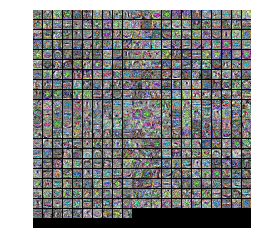

In [18]:
# visualize the weights of the best network
show_net_weights(best_net)
# hs 450 lr 1.000000e-04 reg 1.033333e-01 val accuracy: 0.557000

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [19]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.548
